![Banner|EDA](../Assets/Banner_EDA.png)

Una vez transformados los datos en el proceso ETL, se cargaron a bases de datos y crearon archivos necesarios con la data limpia, concluido el proceso, se continua con el EDA (Analisis Exploratorio de Datos) en donde el objetibo principal que se persigue es interpretar la informacion y entender a fondo que datos se tienen, para que seguidamente se pueda llevar a consumo de clientes o usuarios finales, en este caso, visualizar la información mediante un dashboard interactivo.
La búsqueda del EDA se basa en encontrar datos fuera de contexto (outliers), erróneos, duplicados, faltantes, aunado de descubrir patrones y tendencias en los datos sin olvidar la premisa de evidenciar información acerca del estado histórico y actual de la nación de Argentina y que está sea la base de investigaciones en el ramo o el impulso de la toma decisiones .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
import sweetviz as sv

In [2]:
df_csv = pd.read_csv('../Data/totales_internet_telMovil_TV.csv')

In [7]:
# Generar el informe con sweetviz
report = sv.analyze(df_csv)
report.show_html("reporte_sweetviz_data_total.html")

                                             |          | [  0%]   00:00 -> (? left)

Report reporte_sweetviz_data_total.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
df_csv.head()

Unnamed: 0   Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
0           0  2024          1           28801                    69355   
1           1  2023          4           29708                    71742   
2           2  2023          3           30274                    80609   
3           3  2023          2           30827                    79405   
4           4  2023          1           31437                    82048   

   Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
0                 866152                  950930                   672155   
1                 900253                  978108                   697232   
2                 945608                  998725                   720084   
3                 963510                 1028250                   734125   
4                1001553                 1060321                   729194   

   Entre 20 Mbps y 30 Mbps  Más de 30 Mbps  ...  \
0                   353896         8363694  ...   
1                   350290         8224736  ...   
2                   350918         8003269  ...   
3                   364730         7775095  ...   
4                   357769         7564819  ...   

   Ingresos disp moviles (miles de $)  Accesos disp_movil cada 100 hab  \
0                           769485386                       133.931678   
1                           515335742                       133.917534   
2                           380119973                       130.949964   
3                           307337085                       130.595340   
4                           257558366                       129.632078   

   Accesos TV por suscripción  Accesos TV satelital  \
0                     7601499               1445205   
1                     7650809               1508789   
2                     7743735               1683205   
3                     8076400               1735655   
4                     7770412               1766221   

   Accesos TV por suscripción por cada 100 hab  \
0                                        16.20   
1                                        16.34   
2                                        16.57   
3                                        17.32   
4                                        16.71   

   Accesos TV satelital por cada 100 hab  \
0                                   3.08   
1                                   3.22   
2                                   3.60   
3                                   3.72   
4                                   3.80   

   Accesos TV por suscripción por cada 100 hogares  \
0                                            51.55   
1                                            52.05   
2                                            52.84   
3                                            55.29   
4                                            53.36   

   Accesos TV satelital por cada 100 hogares  \
0                                       9.80   
1                                      10.26   
2                                      11.49   
3                                      11.88   
4                                      12.13   

   Ingresos TV por suscripción  (miles de $)  \
0                               1.907872e+08   
1                               1.335822e+08   
2                               1.037380e+08   
3                               8.701537e+07   
4                               7.473935e+07   

   Ingresos TV satelital (miles de $)  
0                         94270533.93  
1                         64748818.98  
2                         51179479.92  
3                         38625145.74  
4                         33430741.33  

[5 rows x 38 columns]

Extraemos los datos de la Base de datos

In [6]:
# Datos para conectar a la DB
connection = pymysql.connect(
    host='bn83gilwrcfotqoazybx-mysql.services.clever-cloud.com',
    user='uc0tzjpbwmcv8ro5',
    password='LaNI5u2ZjXzafghQRntP',
    db='bn83gilwrcfotqoazybx'
)

# Consulta SQL
consulta_sql = 'SELECT * FROM `total_data_internet_TV_dispMovil`'

#Carga de datos en el DataFrame
df = pd.read_sql(consulta_sql, connection)

#Se cierra la conexión
connection.close()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_20028\3226056675.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(consulta_sql, connection)


---
Descripción general de los datos
---
---

In [40]:
df.head()

anio  trimestre  0 a 512 Kbps  513 Kbps a 1 Mbps  1.1 a 6 Mbps  \
0  2024          1         28801              69355        866152   
1  2023          4         29708              71742        900253   
2  2023          3         30274              80609        945608   
3  2023          2         30827              79405        963510   
4  2023          1         31437              82048       1001553   

   6.1 a 10 Mbps  10.1 a 20 Mbps  20.1 a 30 Mbps  mayor a 30 Mbps  \
0         950930          672155          353896          8363694   
1         978108          697232          350290          8224736   
2         998725          720084          350918          8003269   
3        1028250          734125          364730          7775095   
4        1060321          729194          357769          7564819   

   otras_velocidades  ...  ingresos_disp_moviles(miles)  \
0             328173  ...                   769485386.0   
1             295592  ...                   515335742.0   
2             277421  ...                   380119973.0   
3             275955  ...                   307337085.0   
4             414754  ...                   257558366.0   

   accesos_disp_movil_c100hab  TV_acces_suscripcion  TV_acces_satelital  \
0                      133.93               7601499             1445205   
1                      133.92               7650809             1508789   
2                      130.95               7743735             1683205   
3                      130.60               8076400             1735655   
4                      129.63               7770412             1766221   

   TV_acces_susc_c100hab  TV_acces_sate_c100hab  TV_acces_susc_c100hog  \
0                  16.20                   3.08                  51.55   
1                  16.34                   3.22                  52.05   
2                  16.57                   3.60                  52.84   
3                  17.32                   3.72                  55.29   
4                  16.71                   3.80                  53.36   

   TV_acces_sate_c100hog  TV_ingresos_susc(miles)  TV_ingresos_sate(miles)  
0                   9.80             1.907872e+08              94270533.93  
1                  10.26             1.335822e+08              64748818.98  
2                  11.49             1.037380e+08              51179479.92  
3                  11.88             8.701537e+07              38625145.74  
4                  12.13             7.473935e+07              33430741.33  

[5 rows x 37 columns]

In [41]:
df.shape

(41, 37)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   anio                          41 non-null     int64  
 1   trimestre                     41 non-null     int64  
 2   0 a 512 Kbps                  41 non-null     int64  
 3   513 Kbps a 1 Mbps             41 non-null     int64  
 4   1.1 a 6 Mbps                  41 non-null     int64  
 5   6.1 a 10 Mbps                 41 non-null     int64  
 6   10.1 a 20 Mbps                41 non-null     int64  
 7   20.1 a 30 Mbps                41 non-null     int64  
 8   mayor a 30 Mbps               41 non-null     int64  
 9   otras_velocidades             41 non-null     int64  
 10  total_velocidades             41 non-null     int64  
 11  Mbps(Media de bajada)         41 non-null     float64
 12  ADSL                          41 non-null     int64  
 13  cablemo

In [43]:
df.describe()

anio  trimestre   0 a 512 Kbps  513 Kbps a 1 Mbps  1.1 a 6 Mbps  \
count    41.000000  41.000000      41.000000          41.000000  4.100000e+01   
mean   2018.634146   2.463415   47210.390244      219239.463415  3.233344e+06   
std       2.997967   1.142313   49441.161964      193062.660919  1.526298e+06   
min    2014.000000   1.000000    5675.000000       28521.000000  8.661520e+05   
25%    2016.000000   1.000000   29708.000000       71742.000000  2.531271e+06   
50%    2019.000000   2.000000   35030.000000      195706.000000  3.316868e+06   
75%    2021.000000   3.000000   41064.000000      294413.000000  4.816081e+06   
max    2024.000000   4.000000  241713.000000      687619.000000  5.153437e+06   

       6.1 a 10 Mbps  10.1 a 20 Mbps  20.1 a 30 Mbps  mayor a 30 Mbps  \
count   4.100000e+01    4.100000e+01    4.100000e+01     4.100000e+01   
mean    9.155820e+05    8.898369e+05    4.815391e+05     2.776911e+06   
std     2.322244e+05    4.558204e+05    4.383245e+05     3.055797e+06   
min     2.891820e+05    1.011270e+05    3.450000e+02     1.159500e+04   
25%     8.594130e+05    6.932770e+05    1.245640e+05     3.102200e+04   
50%     9.794160e+05    7.993500e+05    3.647300e+05     1.138728e+06   
75%     1.060321e+06    1.038029e+06    5.959200e+05     4.948174e+06   
max     1.245333e+06    2.068087e+06    1.688748e+06     8.363694e+06   

       otras_velocidades  ...  ingresos_disp_moviles(miles)  \
count          41.000000  ...                  4.100000e+01   
mean       149513.097561  ...                  1.089030e+08   
std        130707.129029  ...                  1.501297e+08   
min             0.000000  ...                  1.593835e+07   
25%             0.000000  ...                  2.741618e+07   
50%        167369.000000  ...                  5.024669e+07   
75%        238455.000000  ...                  1.177519e+08   
max        414754.000000  ...                  7.694854e+08   

       accesos_disp_movil_c100hab  TV_acces_suscripcion  TV_acces_satelital  \
count                   41.000000          4.100000e+01        4.100000e+01   
mean                   133.892683          7.036967e+06        2.263854e+06   
std                      7.980853          5.439062e+05        4.866275e+05   
min                    120.180000          5.434532e+06        0.000000e+00   
25%                    128.370000          6.538382e+06        2.064699e+06   
50%                    132.020000          7.043550e+06        2.460177e+06   
75%                    141.550000          7.564827e+06        2.537610e+06   
max                    148.070000          8.076400e+06        2.662031e+06   

       TV_acces_susc_c100hab  TV_acces_sate_c100hab  TV_acces_susc_c100hog  \
count              41.000000              41.000000              41.000000   
mean               15.700976               5.208049              51.140976   
std                 0.793429               0.838064               1.867505   
min                12.740000               3.080000              42.720000   
25%                15.090000               4.680000              50.340000   
50%                15.700000               5.520000              50.920000   
75%                16.200000               5.790000              52.050000   
max                17.320000               6.110000              55.290000   

       TV_acces_sate_c100hog  TV_ingresos_susc(miles)  TV_ingresos_sate(miles)  
count              41.000000             4.100000e+01             4.100000e+01  
mean               16.996829             3.127180e+07             1.576816e+07  
std                 2.952357             3.852994e+07             1.851451e+07  
min                 9.800000             3.599484e+06             2.001221e+06  
25%                15.030000             8.293761e+06             4.653224e+06  
50%                17.870000             1.747949e+07             8.816484e+06  
75%                19.100000             3.639803e+07             1.803844e+

Las variables tienen buen rango de distribucion entre sus valores en la maoria de las variables

In [44]:
# Obtener el conteo de nulos por columna de df
null_count = df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                              Nulos  Porcentaje
anio                              0         0.0
trimestre                         0         0.0
0 a 512 Kbps                      0         0.0
513 Kbps a 1 Mbps                 0         0.0
1.1 a 6 Mbps                      0         0.0
6.1 a 10 Mbps                     0         0.0
10.1 a 20 Mbps                    0         0.0
20.1 a 30 Mbps                    0         0.0
mayor a 30 Mbps                   0         0.0
otras_velocidades                 0         0.0
total_velocidades                 0         0.0
Mbps(Media de bajada)             0         0.0
ADSL                              0         0.0
cablemodem                        0         0.0
fibra_optica                      0         0.0
wireless                          0         0.0
otros_accesos_tec                 0         0.0
total_accesos_tec                 0         0.0
accesos_cada_100_hab              0         0.0
accesos_cada_100_hogares          0     

No existen presencia de datos nulos o inexistentes en las columnas a estudiar puesto que ya se trataron en el proceso anterior de ETL

No se tienen datos nulos, puesto que ya se trabajaron en el ETL

In [45]:
df.columns

Index(['anio', 'trimestre', '0 a 512 Kbps', '513 Kbps a 1 Mbps',
       '1.1 a 6 Mbps', '6.1 a 10 Mbps', '10.1 a 20 Mbps', '20.1 a 30 Mbps',
       'mayor a 30 Mbps', 'otras_velocidades', 'total_velocidades',
       'Mbps(Media de bajada)', 'ADSL', 'cablemodem', 'fibra_optica',
       'wireless', 'otros_accesos_tec', 'total_accesos_tec',
       'accesos_cada_100_hab', 'accesos_cada_100_hogares', 'BAF-Dial',
       'Dial_up', 'total_dial', 'ingresos_totales(miles)',
       'total_accesos_pospago', 'total_accesos_prepago',
       'total_accesos_operativos', 'ingresos_disp_moviles(miles)',
       'accesos_disp_movil_c100hab', 'TV_acces_suscripcion',
       'TV_acces_satelital', 'TV_acces_susc_c100hab', 'TV_acces_sate_c100hab',
       'TV_acces_susc_c100hog', 'TV_acces_sate_c100hog',
       'TV_ingresos_susc(miles)', 'TV_ingresos_sate(miles)'],
      dtype='object')

---
Boxplots para identificar outliers
---
---


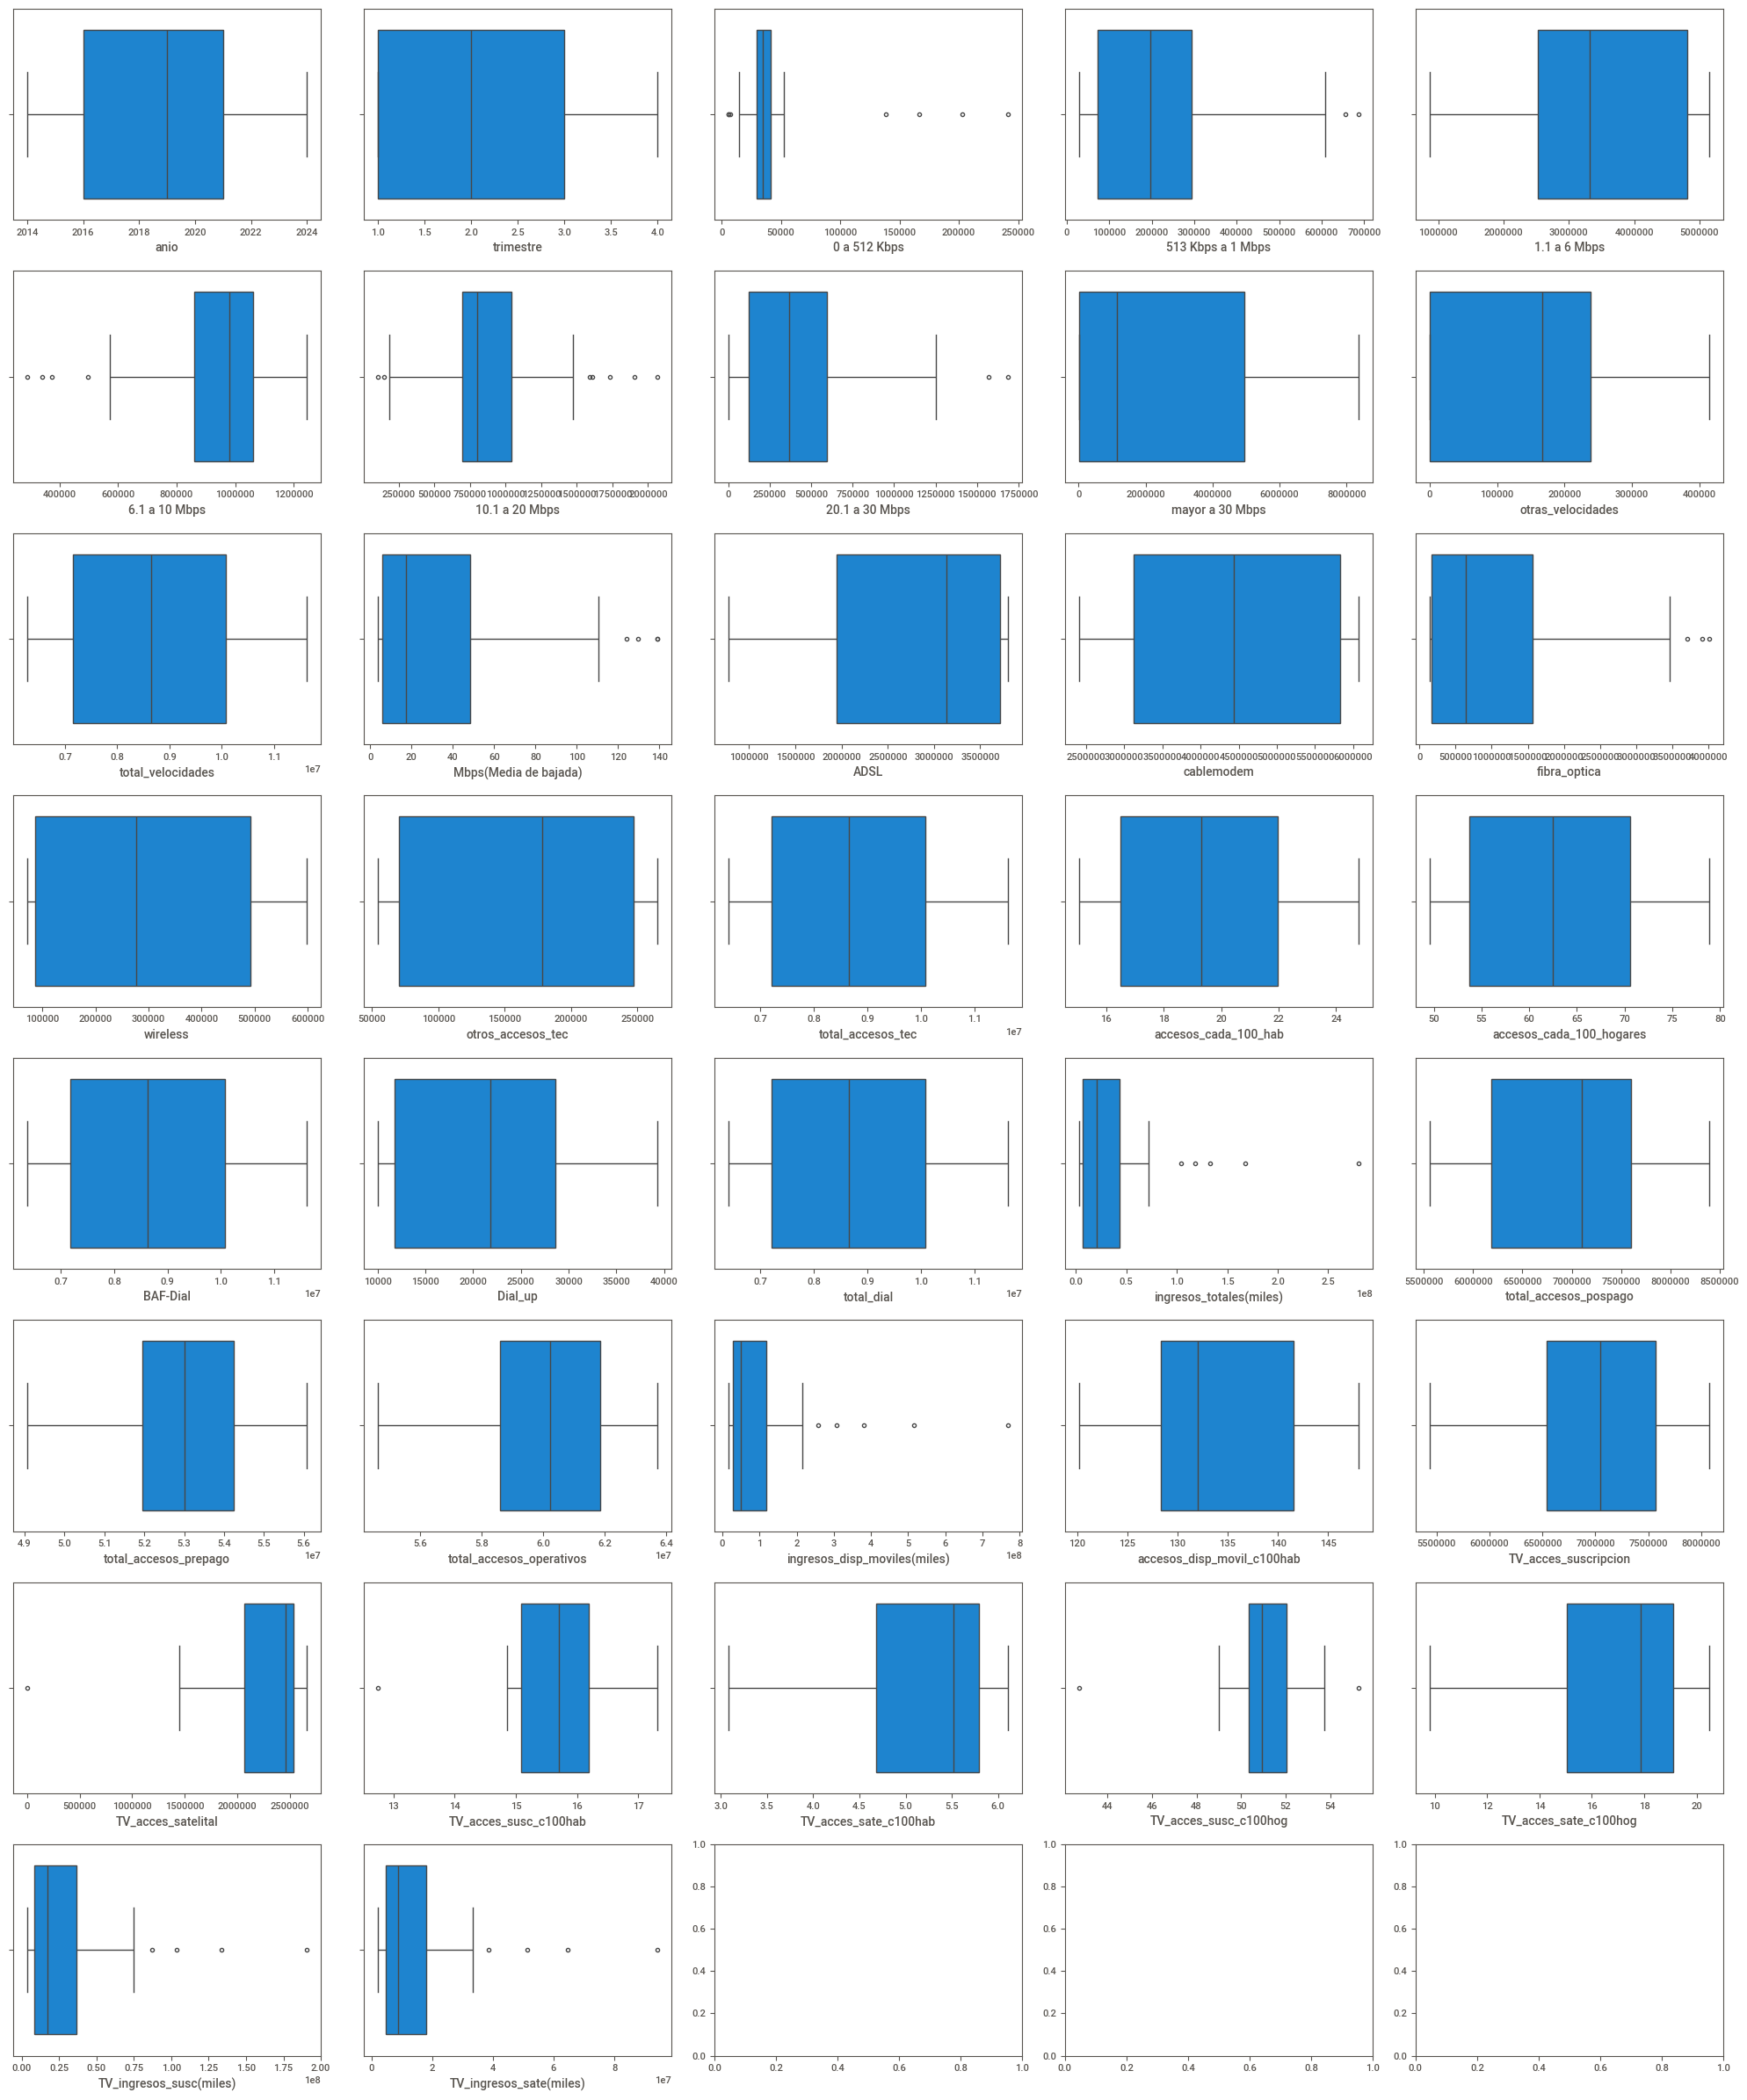

In [46]:
# Configurar la figura con 5 columnas y 6 filas
fig, axes = plt.subplots(8, 5, figsize=(20, 24))

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Crear un boxplot para cada variable
for i, col in enumerate(df.columns[:40]):  # Asegúrate de tener 30 columnas
    sns.boxplot(data=df, x=col, ax=axes[i])
    # axes[i].set_title(col)

# Ajustar el layout para evitar solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Se pueden visualizar en cada una de las variables que hay en el dataset que existen algunas de ellas con presencia de outliers, por ejemplo: 
Velocidad de navegacion de 0 a 512 kbps presenta gran cantidad de outliers, asimismo, de 6.1 a 10 Mbps, 1.1 a 20 Mbps, de 20.1 a 30, la columna de promedio de megabites de bajada, fibra optica, ingresos totales, acceso de Tv satelital, acceso de tv por suscripcion e ingresos por ambos servicio de TV.
Sin embargo, no hay por que preocuparse ya que los valores aunque se encuentren fuera del rango óptimo, son valores de tipo conteo para rango de velocidades, puesto que se llenan con ceros gran cantidad de ellos por ser velocidades no existentes en algunos lugares a estudiar, lo que no generará problema en cuanto al analisis de estas variables.  

---


---
Correlaciones entre variables
---
---

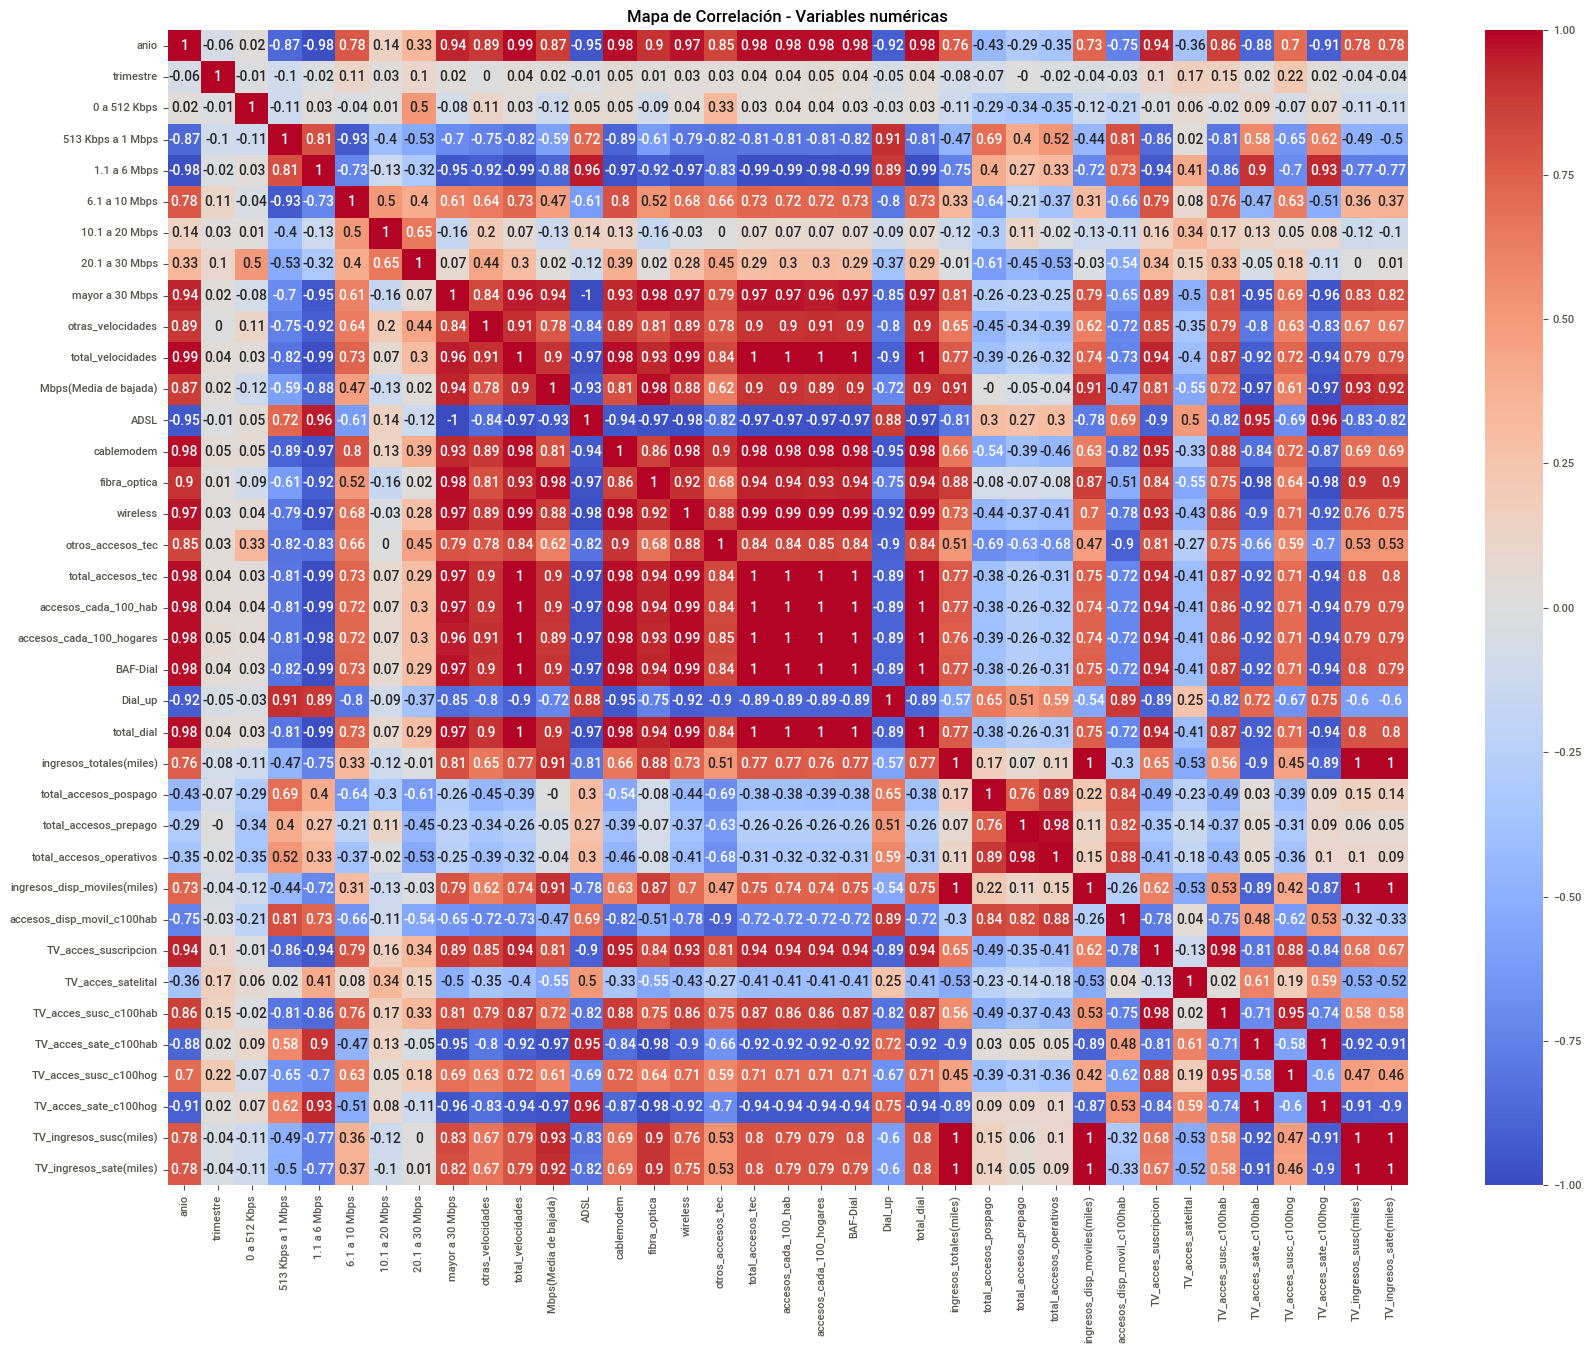

In [49]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = df.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

Existen fuertes correlaciones entre variables por ejemplo:
El año y la suscripcion de TV con un valor de -0.94 lo que indica que mientras más avance el tiempo, menor sera la suscripcion de este servicio, suena lógico puesto que actualmente la tv esta perdiendo presencia debido a la aparicion de plataformas de streaminng, lo mismo ocurre con la variable Dial_up que es un tipo de conexion que actualmente esta desapareciendo por ello una correlacion negativa del -0.92 lo contrario pasa con la conexion de BAF que gana terreno con un 0.98 de correlacion positiva.
Por otra parte las variables con datos de ingreso monetario con la variable Mbps de bajada presenta una fuerte correlación positiva con un valor de 0.91 que se puede traducir como a mayor velocidad de bajada en el servicio de internet, mayor será el ingreso que este se perciba, tambien tiene fuerte correlacion con fibra optica con valor de 0.88, es decir, que el servicio de fibra optica produce mayores ingresos.
De igual forma, para dispositivos móviles el acceso aumenta con los servicio de repago y pospago con correlaciones de 0.82 y 0.88 respectivamente.
en general las correlaciones nos pueden decir mucho de los datos y las variables, sin embargo hay que recordar que correlacion no indica casualidad.

In [52]:
df.columns

Index(['anio', 'trimestre', '0 a 512 Kbps', '513 Kbps a 1 Mbps',
       '1.1 a 6 Mbps', '6.1 a 10 Mbps', '10.1 a 20 Mbps', '20.1 a 30 Mbps',
       'mayor a 30 Mbps', 'otras_velocidades', 'total_velocidades',
       'Mbps(Media de bajada)', 'ADSL', 'cablemodem', 'fibra_optica',
       'wireless', 'otros_accesos_tec', 'total_accesos_tec',
       'accesos_cada_100_hab', 'accesos_cada_100_hogares', 'BAF-Dial',
       'Dial_up', 'total_dial', 'ingresos_totales(miles)',
       'total_accesos_pospago', 'total_accesos_prepago',
       'total_accesos_operativos', 'ingresos_disp_moviles(miles)',
       'accesos_disp_movil_c100hab', 'TV_acces_suscripcion',
       'TV_acces_satelital', 'TV_acces_susc_c100hab', 'TV_acces_sate_c100hab',
       'TV_acces_susc_c100hog', 'TV_acces_sate_c100hog',
       'TV_ingresos_susc(miles)', 'TV_ingresos_sate(miles)'],
      dtype='object')

---
Rangos de velocidad a traves del tiempo
---
---

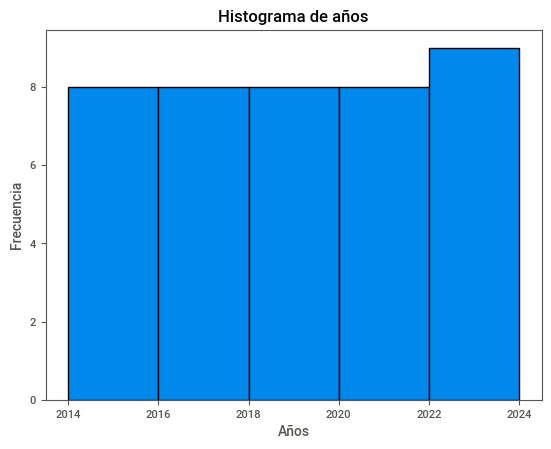

In [93]:
plt.hist(df['anio'], bins=5, edgecolor='black')
plt.title('Histograma de años')
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.show()

El rango de tiempo va desde el 2014 al 2024

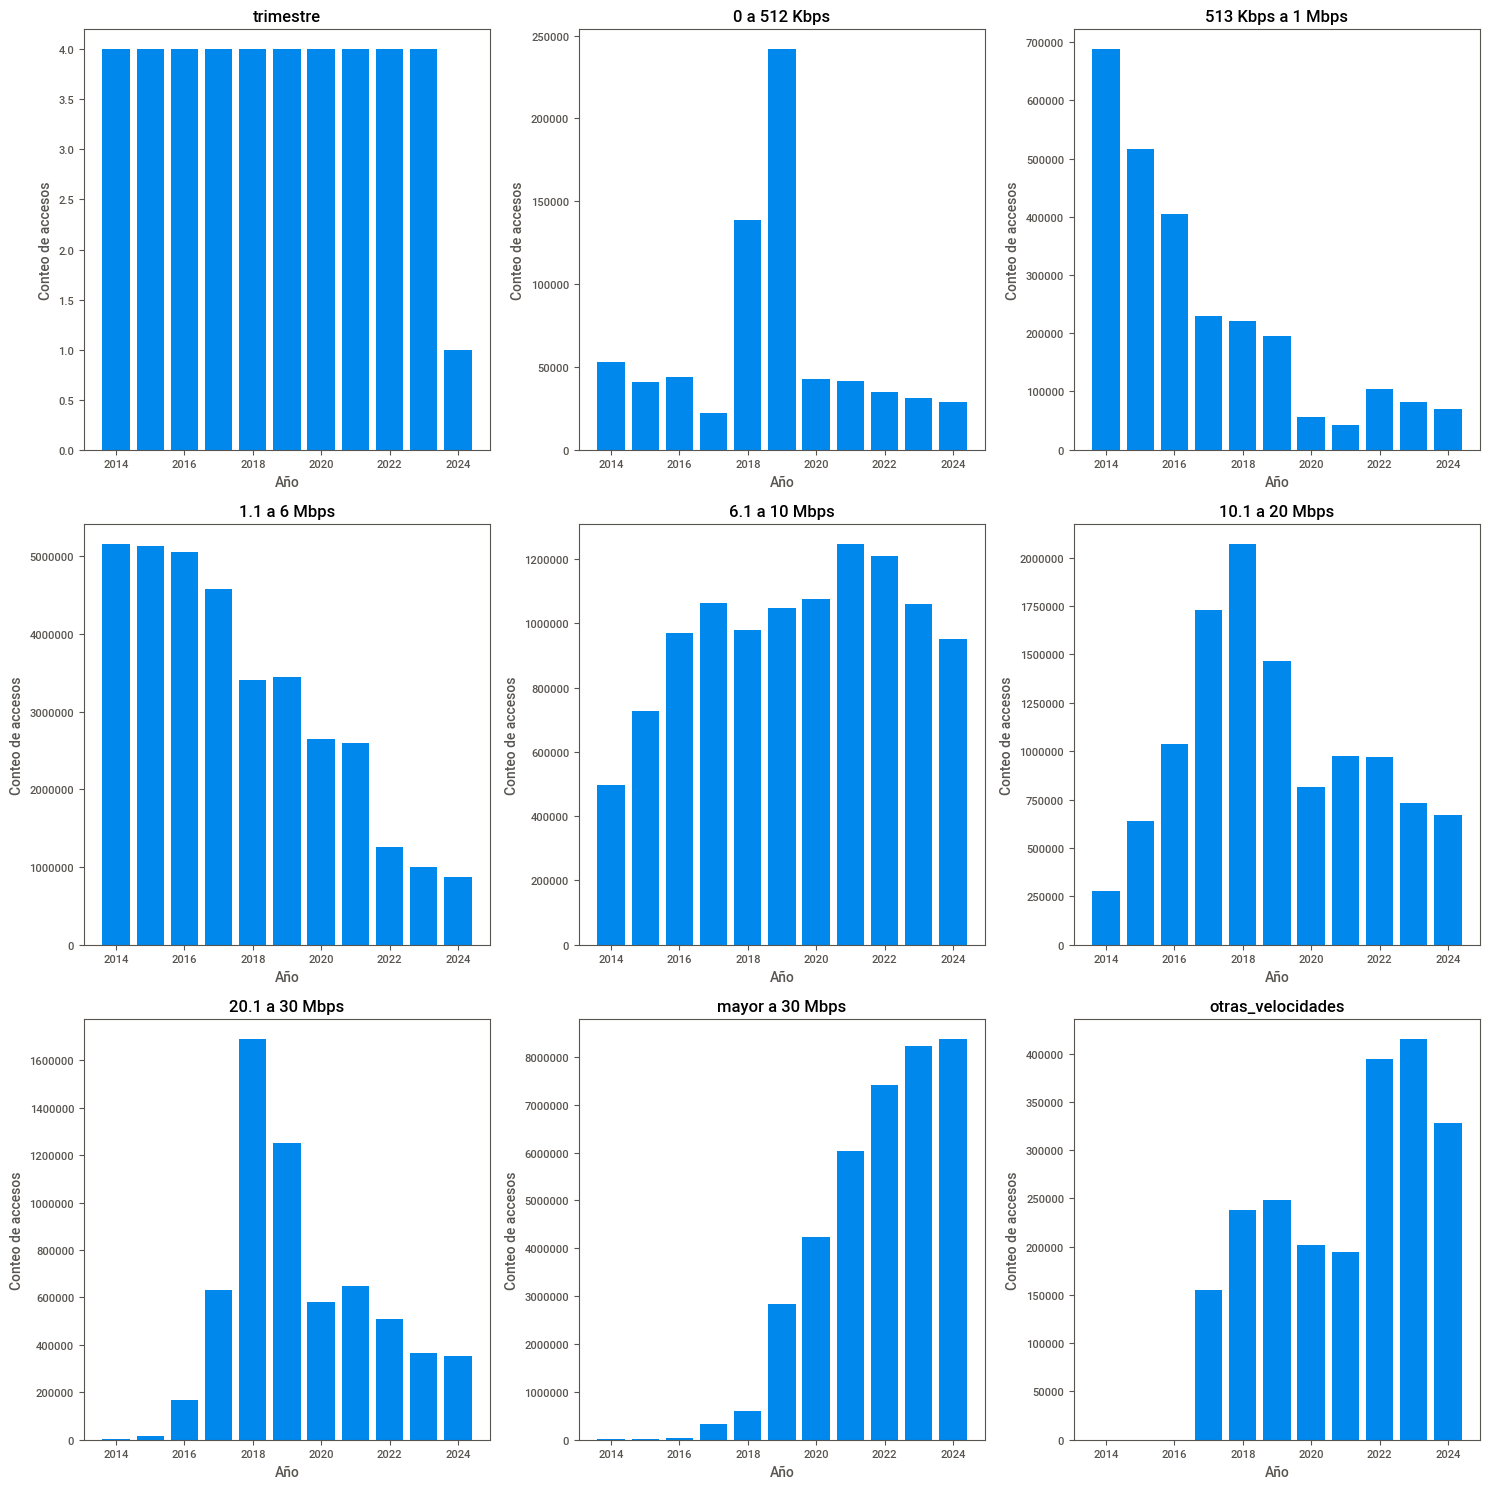

In [91]:
velocidades = '0 a 512 Kbps', '513 Kbps a 1 Mbps','1.1 a 6 Mbps', '6.1 a 10 Mbps', '10.1 a 20 Mbps', '20.1 a 30 Mbps','mayor a 30 Mbps', 'otras_velocidades', 'total_velocidades'

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
# Iterar sobre los subplots y crear un gráfico para cada variable
for i, ax in enumerate(axs.flat):
    variable = df.columns[i+1]  # Saltar columnas
    ax.bar(df['anio'], df[variable], label= variable)
    ax.set_title(variable)
    ax.set_xlabel('Año')
    ax.set_ylabel('Conteo de accesos')
# Ajustar el espacio entre los subplots
plt.tight_layout()
# Mostrar el gráfico
plt.show()


Al analizar las graficos de barras de las diferenetes velocidades presentes en el dataSet se logra identificar que:
1. 0 a 512 kbps --> Tiene un bajo acceso por parte de las personas, es decir, que es muy poco usado en la actualidad
2. 513 kbps a 1 Mbps ha decrementado a lo largo del tiempo, yendo en declibe hacia un escaso o nulo uso en la actualidad al igual que 1 a 6 Mbps
3. 6.1 a 10 y velocidades mayores a 30 Mbps estan a la alza y son las velocidades que m{as uso tienen en la actualidad
}

---
Tipos de conexión a lo largo del tiempo
---
---

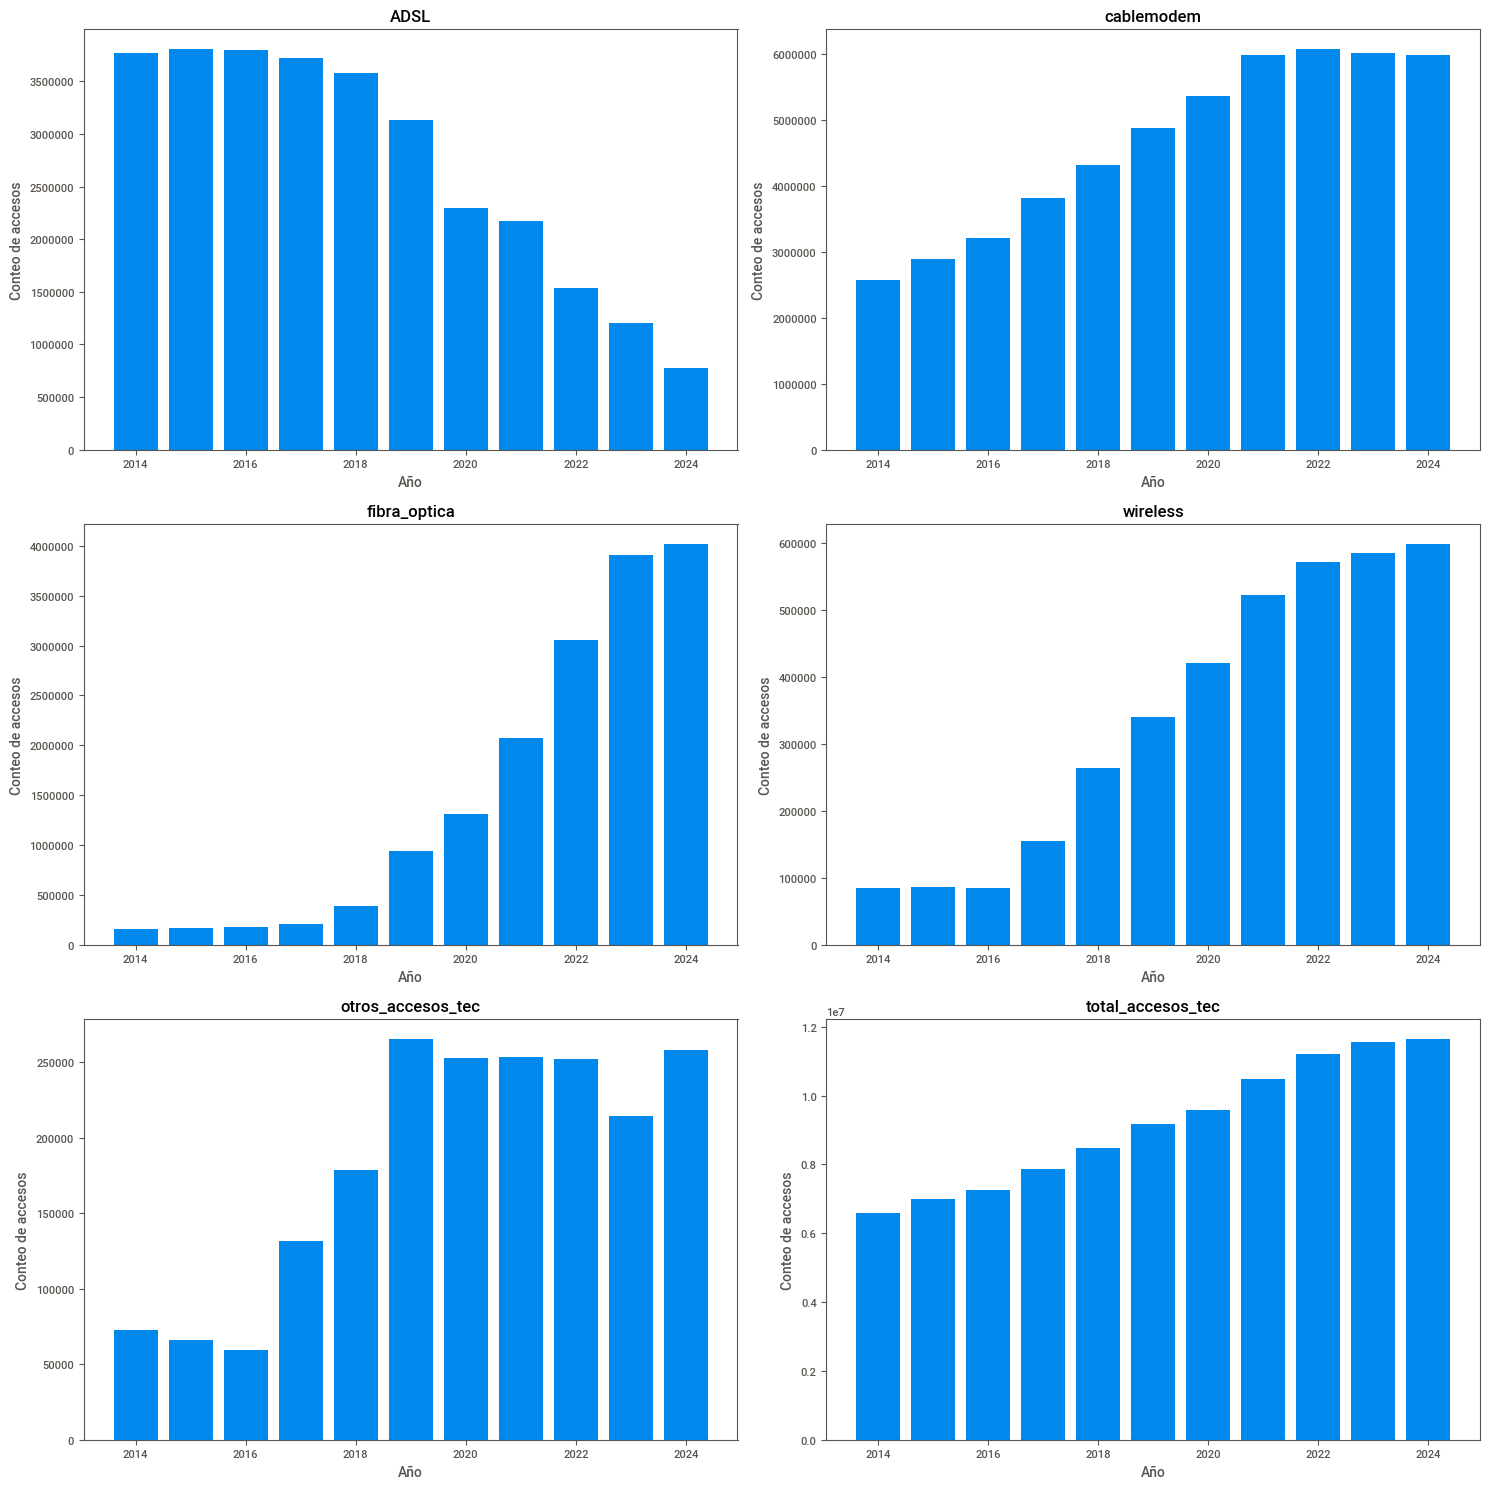

In [104]:
tipos_de_conexion = 'ADSL', 'cablemodem', 'fibra_optica','wireless', 'otros_accesos_tec', 'total_accesos_tec'


fig, axs = plt.subplots(3, 2, figsize=(15, 15))
# Iterar sobre los subplots y crear un gráfico para cada variable
for i, ax in enumerate(axs.flat):
    variable = df.columns[i+12]  # Saltar columnas
    ax.bar(df['anio'], df[variable], label= variable)
    ax.set_title(variable)
    ax.set_xlabel('Año')
    ax.set_ylabel('Conteo de accesos')
# Ajustar el espacio entre los subplots
plt.tight_layout()
# Mostrar el gráfico
plt.show()

Se puede observar que los tipos de conexión de la Tecnología ADSL esta en desuso puesto que  alo largo del tiempo se ha hecho uso cada vez con menor frecuencia.
En contraparte Cablemodem, fibra_óptica y wireless(inalambrica) han ganado popularidad y son los servicios que predominan en el mercado ya que son preferidos por el consumidor.
Inalambrica (wireless) es quien lleva la delantera, seguido de cablemodem y por ultimo fibra optica, aunque cabe destacar que esta ultima incremeneto considerablemente, y se menciona que lleva una tendencia muy alta, por lo que en tiempo futuro podría ser quien se ponga a la delantera.

---
Comparativa entre las conexiones por BAF-Dial y Dial-up
---
---

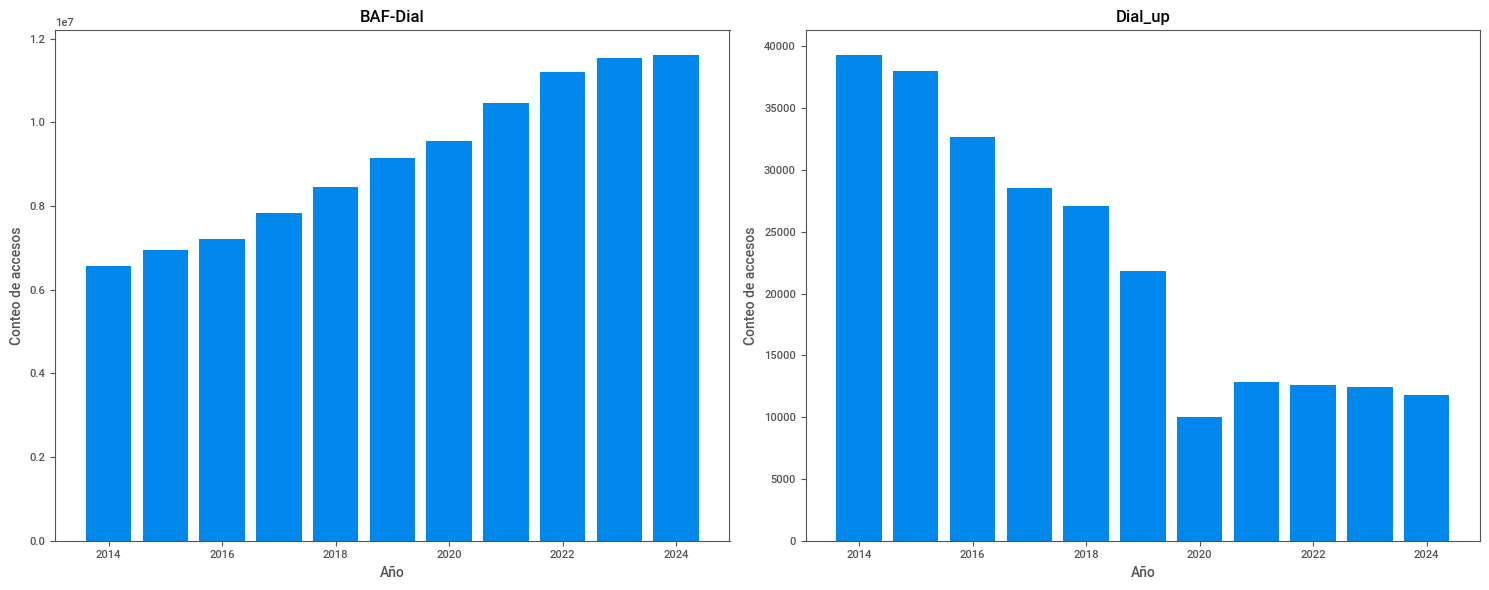

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
# Iterar sobre los subplots y crear un gráfico para cada variable
for i, ax in enumerate(axs.flat):
    variable = df.columns[i+20]  # Saltar columnas
    ax.bar(df['anio'], df[variable], label= variable)
    ax.set_title(variable)
    ax.set_xlabel('Año')
    ax.set_ylabel('Conteo de accesos')
# Ajustar el espacio entre los subplots
plt.tight_layout()
# Mostrar el gráfico
plt.show()

Graficos comparados sin compartir eje Y

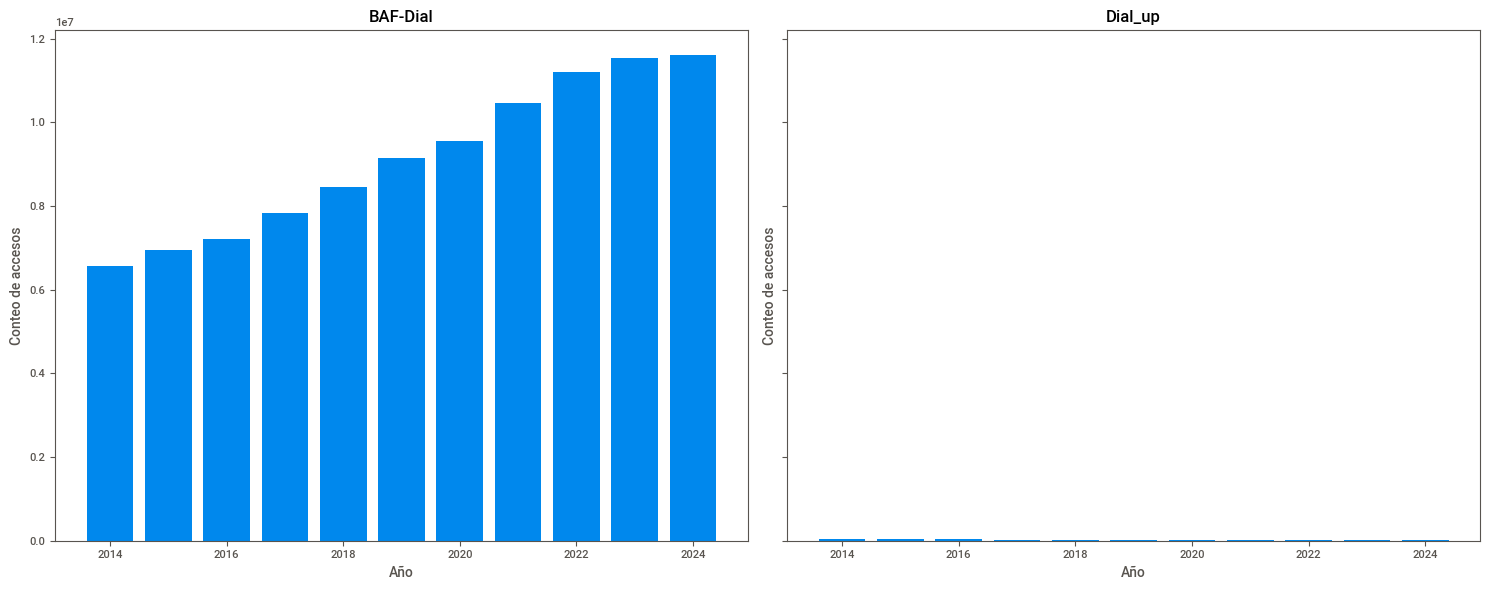

In [105]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
# Iterar sobre los subplots y crear un gráfico para cada variable
for i, ax in enumerate(axs.flat):
    variable = df.columns[i+20]  # Saltar columnas
    ax.bar(df['anio'], df[variable], label= variable)
    ax.set_title(variable)
    ax.set_xlabel('Año')
    ax.set_ylabel('Conteo de accesos')
# Ajustar el espacio entre los subplots
plt.tight_layout()
# Mostrar el gráfico
plt.show()

Los gráficos muestran que las conexiones por Banda Ancha es la que esta ganando terreno en la forma en como llega el internet a los domicilios, grafico de barras que se muestra del lado izquierdo, en el lado contrario se observa como la conexion por Dial-up ha dejado poco a poco de ser la favorita perdiendo accesos en cuanto avanza el tiempo.

---
Historico, velocidad de bajada 
---
---

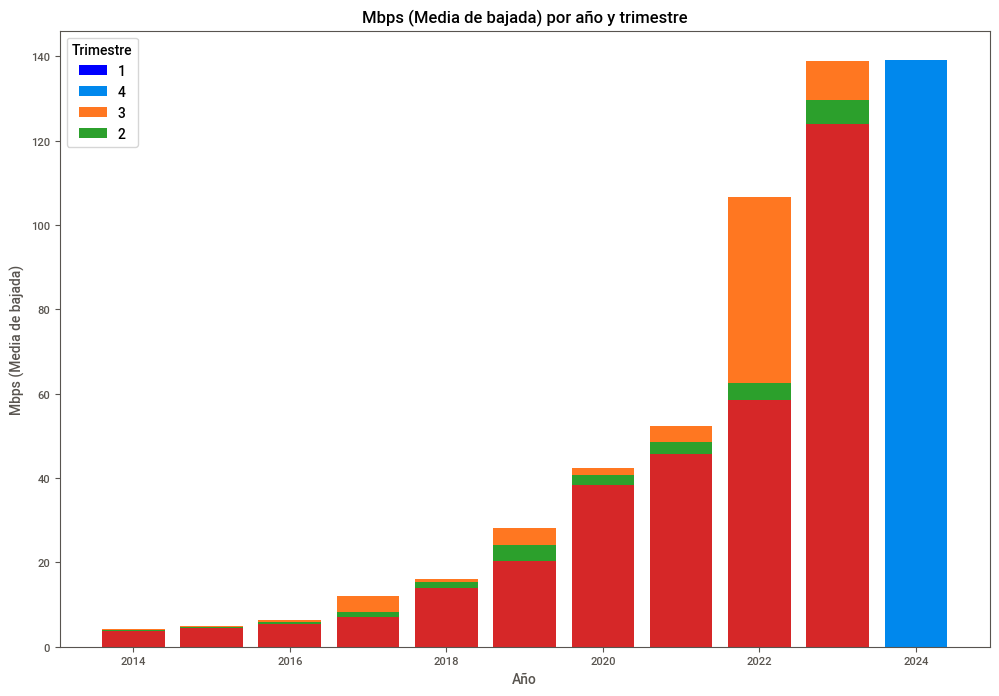

In [116]:
plt.figure(figsize=(12, 8))
# Crear el gráfico de barras
plt.bar(df['anio'], df['Mbps(Media de bajada)'], color='blue')

# Agregar color según el trimestre
for i, trimestre in enumerate(df['trimestre'].unique()):
    plt.bar(df[df['trimestre'] == trimestre]['anio'], df[df['trimestre'] == trimestre]['Mbps(Media de bajada)'])

# Agregar título y etiquetas
plt.title('Mbps (Media de bajada) por año y trimestre')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')

plt.legend(df['trimestre'].unique(), title='Trimestre')

plt.show()

En el grafico anterior, se puede observar como ha incrementado la velocidad de navegación del internet a lo largo del tiempo.

---
Accesos en dispositivos móviles
---
---

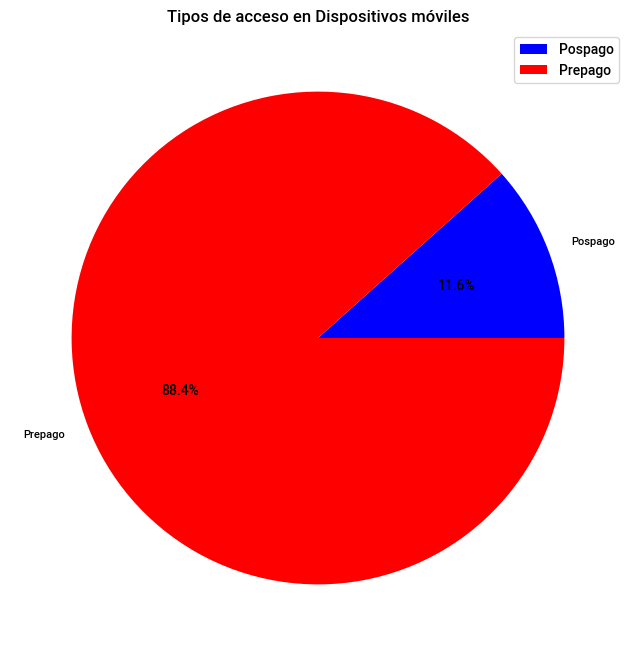

In [124]:
# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie([df['total_accesos_pospago'].sum(), df['total_accesos_prepago'].sum()], labels=['Pospago', 'Prepago'], autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Tipos de acceso en Dispositivos móviles')
plt.legend(['Pospago', 'Prepago'], loc='upper right')

# Mostrar el gráfico
plt.show()

En el gráfico de torta se puede notar que dentro de los dispositivos móviles, el tipo de prepago es el esquema que predomina, con un 88.4 % contra un 11.6% en contrate con pospago, es decir en planes para dispositivos móviles

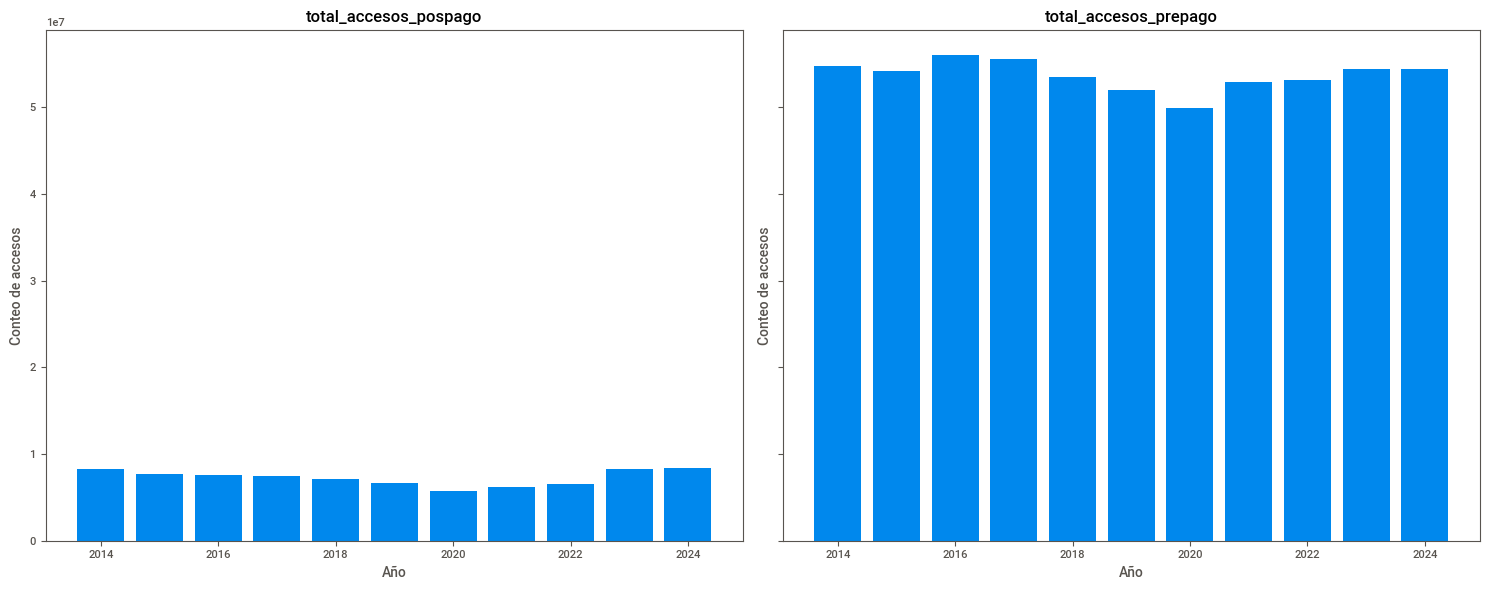

In [125]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
# Iterar sobre los subplots y crear un gráfico para cada variable
for i, ax in enumerate(axs.flat):
    variable = df.columns[i+24]  # Saltar columnas
    ax.bar(df['anio'], df[variable], label= variable)
    ax.set_title(variable)
    ax.set_xlabel('Año')
    ax.set_ylabel('Conteo de accesos')
# Ajustar el espacio entre los subplots
plt.tight_layout()
# Mostrar el gráfico
plt.show()

A lo largo del tiempo no se ha visto mucha diferencia entre los tipos de esquema de dispositivos móviles, el tipo prepago siempre ha estado en la delantera.

---
Accesos de Televisión y sus tipos (Satelital y suscripción)
---
---

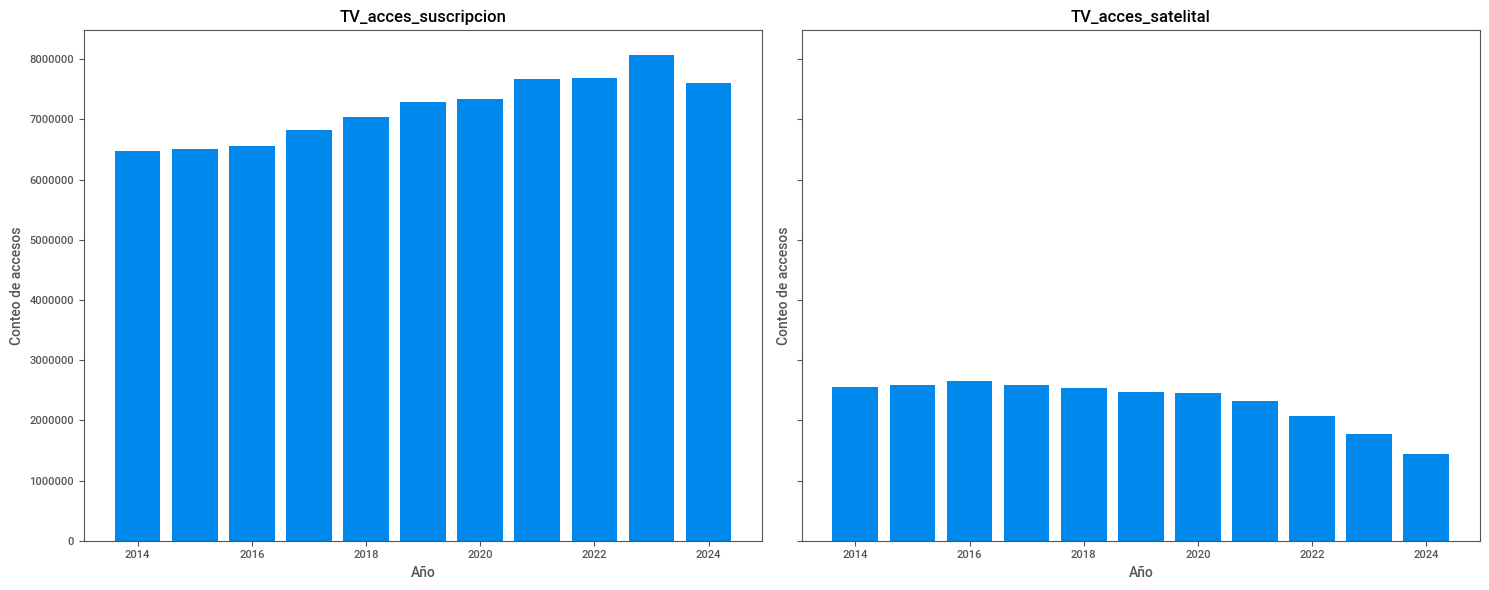

In [128]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
# Iterar sobre los subplots y crear un gráfico para cada variable
for i, ax in enumerate(axs.flat):
    variable = df.columns[i+29]  # Saltar columnas
    ax.bar(df['anio'], df[variable], label= variable)
    ax.set_title(variable)
    ax.set_xlabel('Año')
    ax.set_ylabel('Conteo de accesos')
# Ajustar el espacio entre los subplots
plt.tight_layout()
# Mostrar el gráfico
plt.show()

De igual forma que los dispositivos móviles, la TV por suscripción siempre ha estado en la delantera y ha incrementado a lo largo del tiempo, mientras que la Tv con acceso bía satelital esta por debajo y va en decremento.

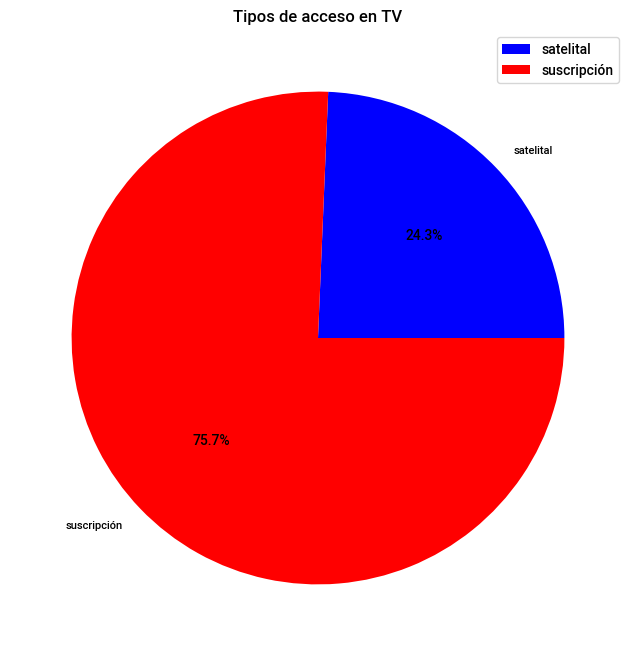

In [130]:
# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie([df['TV_acces_satelital'].sum(), df['TV_acces_suscripcion'].sum()], labels=['satelital', 'suscripción'], autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Tipos de acceso en TV')
plt.legend(['satelital', 'suscripción'], loc='upper right')

# Mostrar el gráfico
plt.show()

La diferencia se encuentra muy marcada entre los dos tipos de sistema de TV quedando muy en alto la TV por suscripción

---
Ingresos
---
---

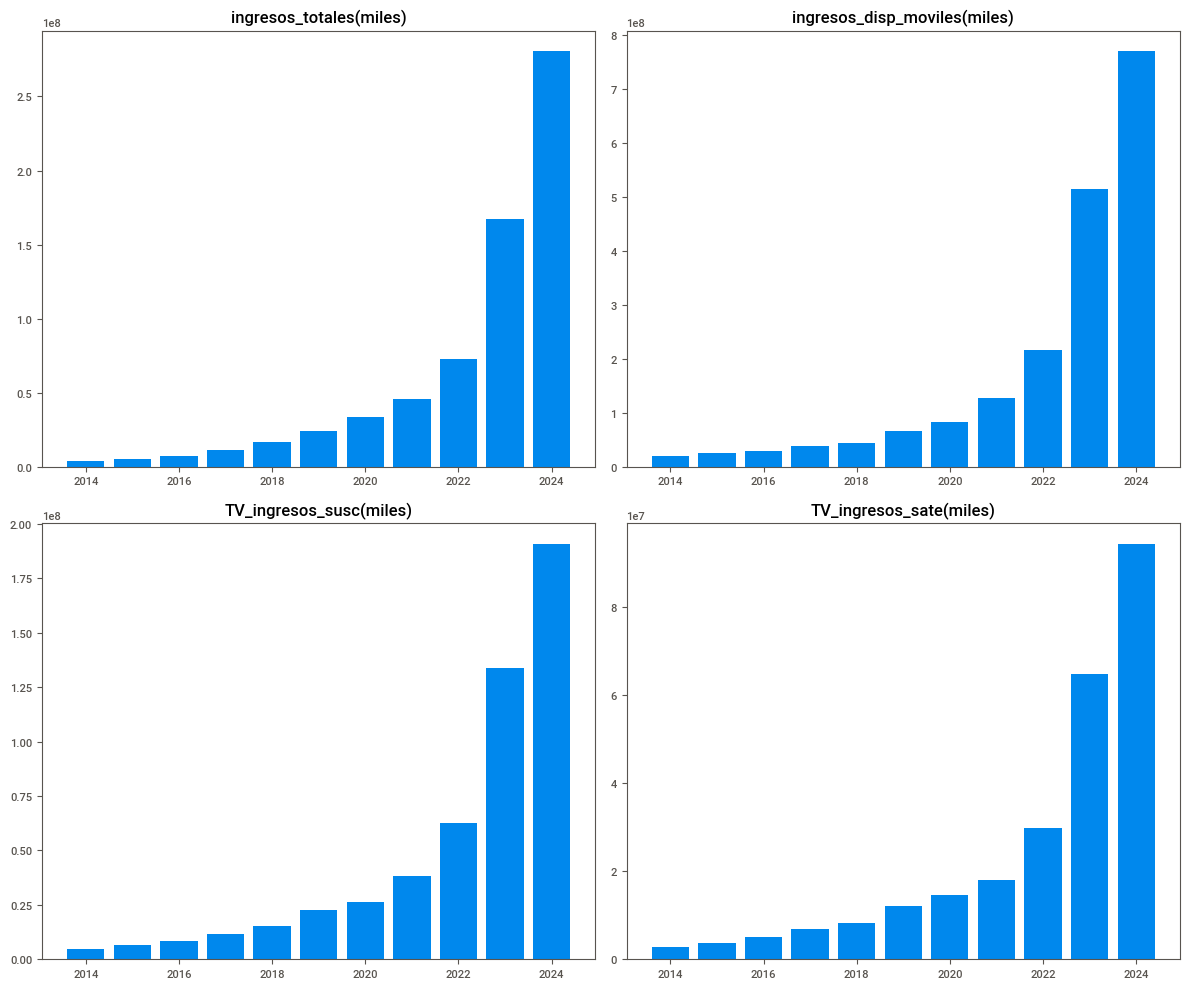

In [136]:
columnas = ['ingresos_totales(miles)', 'ingresos_disp_moviles(miles)', 'TV_ingresos_susc(miles)', 'TV_ingresos_sate(miles)' ]

# Crear una figura y una matriz de subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Columnas a comparar
columnas = ['ingresos_totales(miles)', 'ingresos_disp_moviles(miles)', 'TV_ingresos_susc(miles)', 'TV_ingresos_sate(miles)']

# Iterar sobre los subplots y crear un gráfico de línea para cada columna
for i, ax in enumerate(axs.flat):
    ax.bar(df['anio'], df[columnas[i]])
    ax.set_title(columnas[i])

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

En general, se puede observar que los ingresos en cualquiera de los servicios de telecomuncaciones van a la alza y en todos los casos incrementa

Comparando todos los ingresos en un mismo gráfico

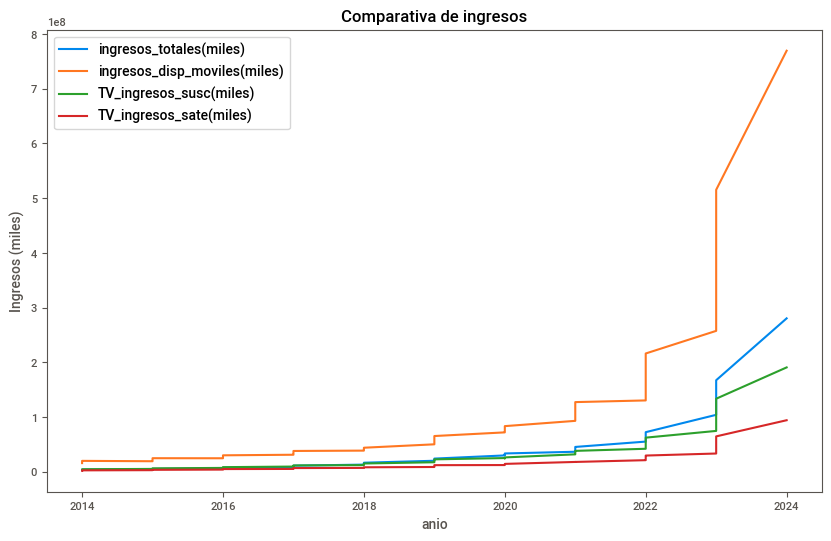

In [139]:
# Columnas a comparar
columnas = ['ingresos_totales(miles)', 'ingresos_disp_moviles(miles)', 'TV_ingresos_susc(miles)', 'TV_ingresos_sate(miles)']

# Crear el gráfico
plt.figure(figsize=(10, 6))
for columna in columnas:
    plt.plot(df['anio'], df[columna], label=columna)

# Agregar título y etiquetas
plt.title('Comparativa de ingresos')
plt.xlabel('anio')
plt.ylabel('Ingresos (miles)')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

De acuerdo al grafico, el ingreso que mayor ha generado es de Ingresos por dispositivos móviles, es de esperarse, hoy en día los telefonos móviles son indispensables para todos
Seguidamente los ingresos totales por internet linea de color azul también genera demsasidos ingresos monetarios
Seguido de ingresoso por TV en modo suscripcion y 
Al final Tv en modo satelital

---
Accesos cada 100 habitantes
---
---

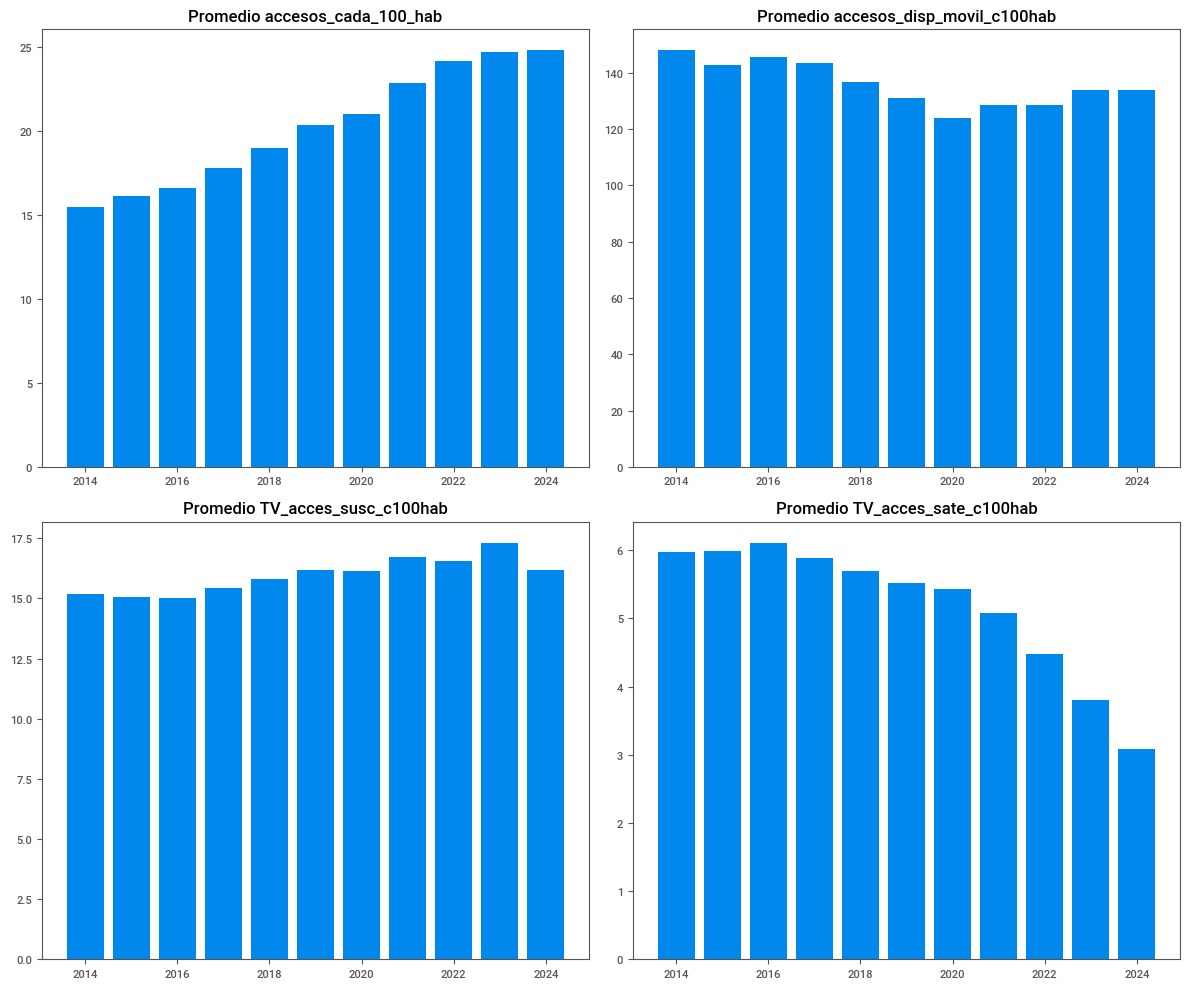

In [141]:
columnas = ['accesos_cada_100_hab', 'accesos_disp_movil_c100hab', 'TV_acces_susc_c100hab', 'TV_acces_sate_c100hab' ]

# Crear una figura y una matriz de subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Iterar sobre los subplots y crear un gráfico de línea para cada columna
for i, ax in enumerate(axs.flat):
    ax.bar(df['anio'], df[columnas[i]])
    ax.set_title(f'Promedio {columnas[i]}')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Según el gráfico presentado los dispositivos móviles on los que tienen el mayor número de accesos por cada 100 habitantes sobrepasando 1 por cada persona, lo que quiere decir que una persona cuenta con más de un dispositivo movil.
En segundo lugar esta los accesos a internet por cada 100 hbitantes 
En las variables de TV se encuentran en TV po suscripcion y al fianl TV por satelite.

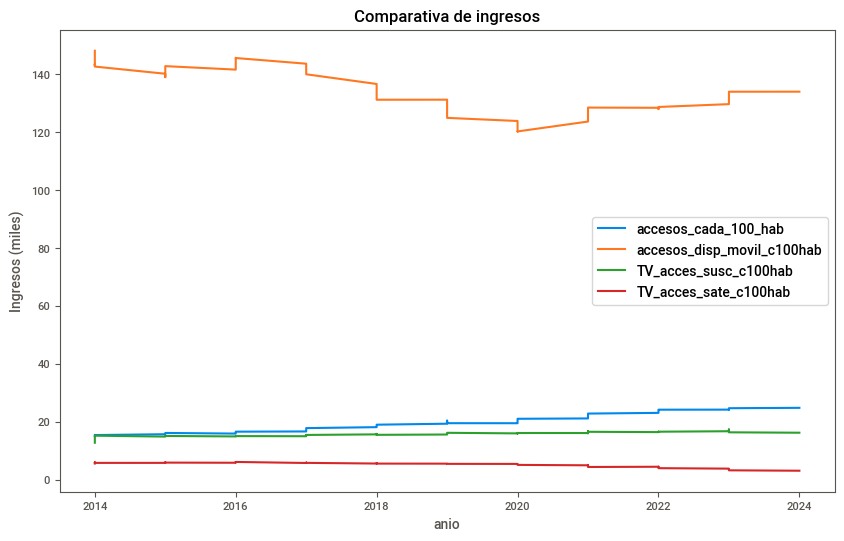

In [142]:
# Columnas a comparar
columnas = ['accesos_cada_100_hab', 'accesos_disp_movil_c100hab', 'TV_acces_susc_c100hab', 'TV_acces_sate_c100hab' ]

# Crear el gráfico
plt.figure(figsize=(10, 6))
for columna in columnas:
    plt.plot(df['anio'], df[columna], label=columna)

# Agregar título y etiquetas
plt.title('Comparativa de ingresos')
plt.xlabel('anio')
plt.ylabel('Ingresos (miles)')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

---
Penetracion cada 100 hogares
---
---

IndexError: list index out of range

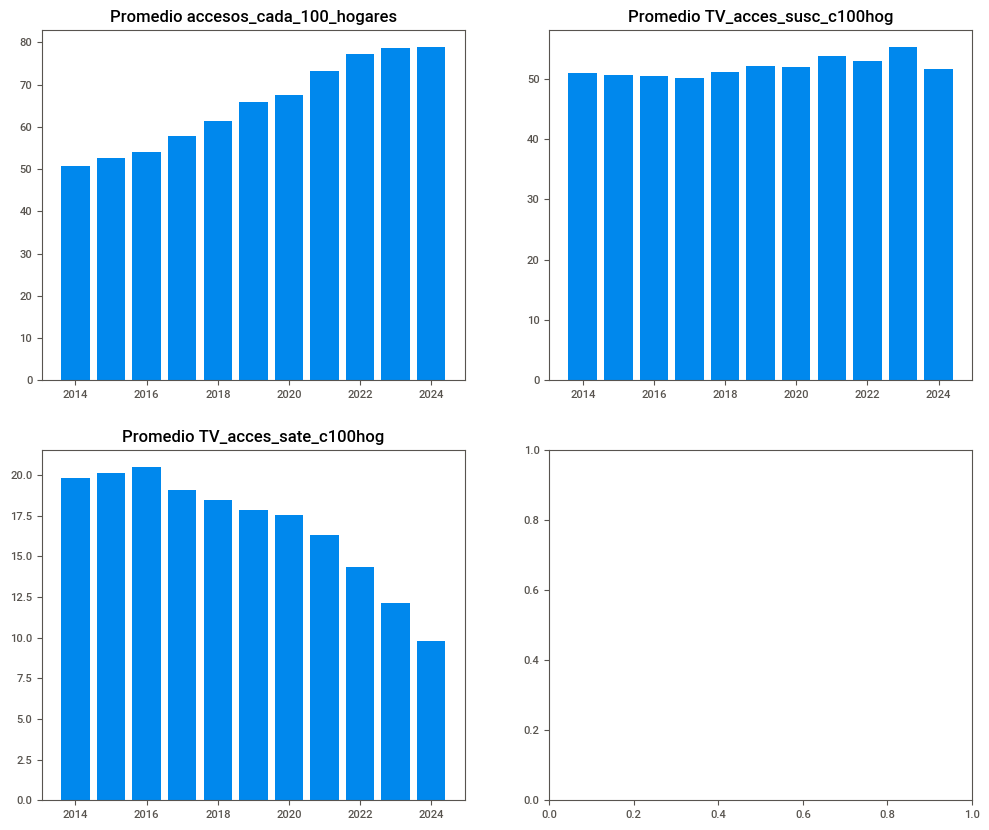

In [143]:
columnas = ['accesos_cada_100_hogares', 'TV_acces_susc_c100hog', 'TV_acces_sate_c100hog' ]

# Crear una figura y una matriz de subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Iterar sobre los subplots y crear un gráfico de línea para cada columna
for i, ax in enumerate(axs.flat):
    ax.bar(df['anio'], df[columnas[i]])
    ax.set_title(f'Promedio {columnas[i]}')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

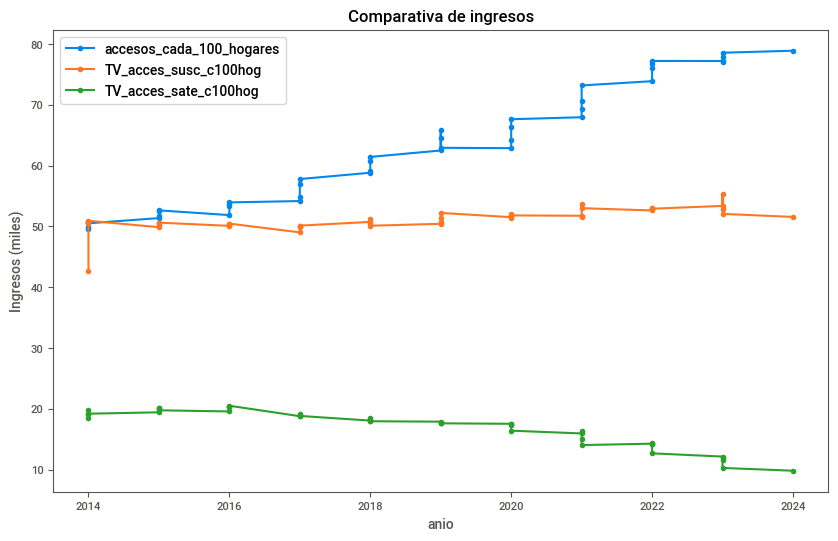

In [145]:
# Columnas a comparar
columnas = ['accesos_cada_100_hogares', 'TV_acces_susc_c100hog', 'TV_acces_sate_c100hog' ]

# Crear el gráfico
plt.figure(figsize=(10, 6))
for columna in columnas:
    plt.plot(df['anio'], df[columna], label=columna, marker="o")

# Agregar título y etiquetas
plt.title('Comparativa de ingresos')
plt.xlabel('anio')
plt.ylabel('Ingresos (miles)')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

El grafico muestra que la penetracion a hogares va en aumento, es decir más hogares están contratando servicios de internet, a finales de 2024 con un 80% aproximadamente
Mientras que Tv por suscripción se mantiene y Tv por vía satelite está en decremento

---
Analisis de Mapa de conectividad
---
---

In [4]:
# Datos para conectar a la DB
connection = pymysql.connect(
    host='bn83gilwrcfotqoazybx-mysql.services.clever-cloud.com',
    user='uc0tzjpbwmcv8ro5',
    password='LaNI5u2ZjXzafghQRntP',
    db='bn83gilwrcfotqoazybx'
)

# Consulta SQL
consulta_sql = 'SELECT * FROM `mapa_conectividad_total3`'

#Carga de datos en el DataFrame
df = pd.read_sql(consulta_sql, connection)

#Se cierra la conexión
connection.close()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20028\215330518.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(consulta_sql, connection)


In [147]:
df

link     provincia           partido                localidad  \
0      6854100  BUENOS AIRES        25 DE MAYO               25 DE MAYO   
1      6854010  BUENOS AIRES        25 DE MAYO          AGUSTÍN MOSCONI   
2      6854020  BUENOS AIRES        25 DE MAYO                DEL VALLE   
3      6854030  BUENOS AIRES        25 DE MAYO                ERNESTINA   
4      6854040  BUENOS AIRES        25 DE MAYO        GOBERNADOR UGARTE   
...        ...           ...               ...                      ...   
4300  82042310      SANTA FE     GENERAL LÓPEZ              WHEELWRIGHT   
4301  82049010      SANTA FE  GENERAL OBLIGADO            ARROYO CEIBAL   
4302  82049020      SANTA FE  GENERAL OBLIGADO  AVELLANEDA (EST. EWALD)   
4303  82049030      SANTA FE  GENERAL OBLIGADO                    BERNA   
4304  82049040      SANTA FE  GENERAL OBLIGADO                 EL ARAZA   

      0 a 1 Mbps  1.5 a 3 Mbps  3.3 a 5 Mbps  6 a 10 Mbps  10.1 a 25 Mbps  \
0             21            85           145          663            2356   
1              0             0             0           59               5   
2              1           181             0           10               0   
3              0             0            75            0               0   
4              0           109            63            8               0   
...          ...           ...           ...          ...             ...   
4300          11             1             0            0               0   
4301          15            69            23            0               0   
4302         160           605           298           47              34   
4303           0             0             0           48               0   
4304           0             0             0          126               0   

      25.1 a 50 Mbps  ...  cablemodem  dial-up  fibra_optica  satelital  \
0               2175  ...           1        0             0          1   
1                  0  ...           0        0             0          0   
2                  0  ...           0        0             0          1   
3                  0  ...           0        0             0          0   
4                  0  ...           0        0             0          0   
...              ...  ...         ...      ...           ...        ...   
4300            1383  ...           1        0             1          1   
4301               0  ...           0        0             0          0   
4302            1659  ...           0        0             1          0   
4303               0  ...           0        0             0          0   
4304               0  ...           0        0             0          0   

      wireless  tel_fija  3G  4G    latitud   longitud  
0            1         1   1   1 -35.433939 -60.173121  
1            0         1   0   0 -35.739217 -60.559063  
2            0         0   1   0 -35.897345 -60.731609  
3            0         1   0   0 -35.270234 -59.557503  
4            1         0   0   0 -35.164397 -60.081358  
...        ...       ...  ..  ..        ...        ...  
4300         1         1   1   1 -33.794294 -61.211441  
4301         1         1   0   1 -28.725087 -59.480416  
4302         1         1   1   1 -29.119366 -59.659251  
4303         1         1   0   1 -29.275268 -59.847222  
4304         1         1   0   1 -29.133494 -59.947315  

[4305 rows x 27 columns]

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   link               4305 non-null   int64  
 1   provincia          4305 non-null   object 
 2   partido            4305 non-null   object 
 3   localidad          4305 non-null   object 
 4   0 a 1 Mbps         4305 non-null   int64  
 5   1.5 a 3 Mbps       4305 non-null   int64  
 6   3.3 a 5 Mbps       4305 non-null   int64  
 7   6 a 10 Mbps        4305 non-null   int64  
 8   10.1 a 25 Mbps     4305 non-null   int64  
 9   25.1 a 50 Mbps     4305 non-null   int64  
 10  50.1 a 100 Mbps    4305 non-null   int64  
 11  100.1 a 300 Mbps   4305 non-null   int64  
 12  300.1 a 500 Mbps   4305 non-null   int64  
 13  mayor a 500 Mbps   4305 non-null   int64  
 14  otras_velocidades  4305 non-null   int64  
 15  poblacion          4305 non-null   int64  
 16  ADSL               4305 

Igual que en el caso anterior no se observan datos nulos ya que fueron tratados en el proceso de ETL, tambien el tipo de datos es correcto por lo que están bien transformado

In [152]:
pd.set_option('float_format', '{:.2f}'.format)
df.describe()

link  0 a 1 Mbps  1.5 a 3 Mbps  3.3 a 5 Mbps  6 a 10 Mbps  \
count     4305.00     4305.00       4305.00       4305.00      4305.00   
mean  38980200.99       15.27         56.35         64.34       277.59   
std   29430357.07       91.71        253.16        334.32      1850.24   
min          0.00        0.00          0.00          0.00         0.00   
25%   10084080.00        0.00          0.00          0.00         0.00   
50%   34007007.00        0.00          0.00          0.00         0.00   
75%   66126010.00        1.00          8.00          4.00        90.00   
max   94014020.00     2145.00       6396.00       7963.00     75937.00   

       10.1 a 25 Mbps  25.1 a 50 Mbps  50.1 a 100 Mbps  100.1 a 300 Mbps  \
count         4305.00         4305.00          4305.00           4305.00   
mean           191.88          577.01           452.71            515.14   
std           1263.13         4652.38          4111.39           3407.05   
min              0.00            0.00             0.00              0.00   
25%              0.00            0.00             0.00              0.00   
50%              0.00            0.00             0.00              0.00   
75%             18.00            0.00             0.00              0.00   
max          45687.00       174690.00        174846.00         118990.00   

       300.1 a 500 Mbps  ...  cablemodem  dial-up  fibra_optica  satelital  \
count           4305.00  ...     4305.00  4305.00       4305.00    4305.00   
mean              46.23  ...        0.20     0.09          0.37       0.24   
std              318.70  ...        0.40     0.29          0.48       0.43   
min                0.00  ...        0.00     0.00          0.00       0.00   
25%                0.00  ...        0.00     0.00          0.00       0.00   
50%                0.00  ...        0.00     0.00          0.00       0.00   
75%                0.00  ...        0.00     0.00          1.00       0.00   
max            13083.00  ...        1.00     1.00          1.00       1.00   

       wireless  tel_fija      3G      4G  latitud  longitud  
count   4305.00   4305.00 4305.00 4305.00  4305.00   4305.00  
mean       0.52      0.50    0.45    0.52   -32.26    -63.04  
std        0.50      0.50    0.50    0.50     5.00      3.83  
min        0.00      0.00    0.00    0.00   -77.87    -72.89  
25%        0.00      0.00    0.00    0.00   -34.71    -65.69  
50%        1.00      0.00    0.00    1.00   -32.29    -63.45  
75%        1.00      1.00    1.00    1.00   -28.58    -60.01  
max        1.00      1.00    1.00    1.00   -21.82    -34.63  

[8 rows x 24 columns]

Hay que recordar que los datos numéricos que se encuentran en la mayoria de los campos son conteos, por lo que la existencia de ceros es correcta y no son datos faltantes o nulos que fueron rellenados. También en las columnas de tipos de conexión el valor mayor es uno, la razón es por que indica existencia de la conexion en la provincia, mientras que cero indica ausencia.

Se realiza un análisis con la libreria report, que ayuda a generar un informe con algunas caracteristicas de la data.

In [5]:
# Generar el informe con sweetviz
report = sv.analyze(df_csv)
report.show_html("reporte_sweetviz_mapa_conectividad.html")

                                             |          | [  0%]   00:00 -> (? left)

Report reporte_sweetviz_mapa_conectividad.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [153]:
# Obtener el conteo de nulos por columna de df
null_count = df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                   Nulos  Porcentaje
link                   0        0.00
provincia              0        0.00
partido                0        0.00
localidad              0        0.00
0 a 1 Mbps             0        0.00
1.5 a 3 Mbps           0        0.00
3.3 a 5 Mbps           0        0.00
6 a 10 Mbps            0        0.00
10.1 a 25 Mbps         0        0.00
25.1 a 50 Mbps         0        0.00
50.1 a 100 Mbps        0        0.00
100.1 a 300 Mbps       0        0.00
300.1 a 500 Mbps       0        0.00
mayor a 500 Mbps       0        0.00
otras_velocidades      0        0.00
poblacion              0        0.00
ADSL                   0        0.00
cablemodem             0        0.00
dial-up                0        0.00
fibra_optica           0        0.00
satelital              0        0.00
wireless               0        0.00
tel_fija               0        0.00
3G                     0        0.00
4G                     0        0.00
latitud                0        0.00
l

Gracias al buen tratado de los datos en el ETL, no se observan Nulos en todo el DataSet

---
Graficando Boxplots para identificar Outliers
---
---

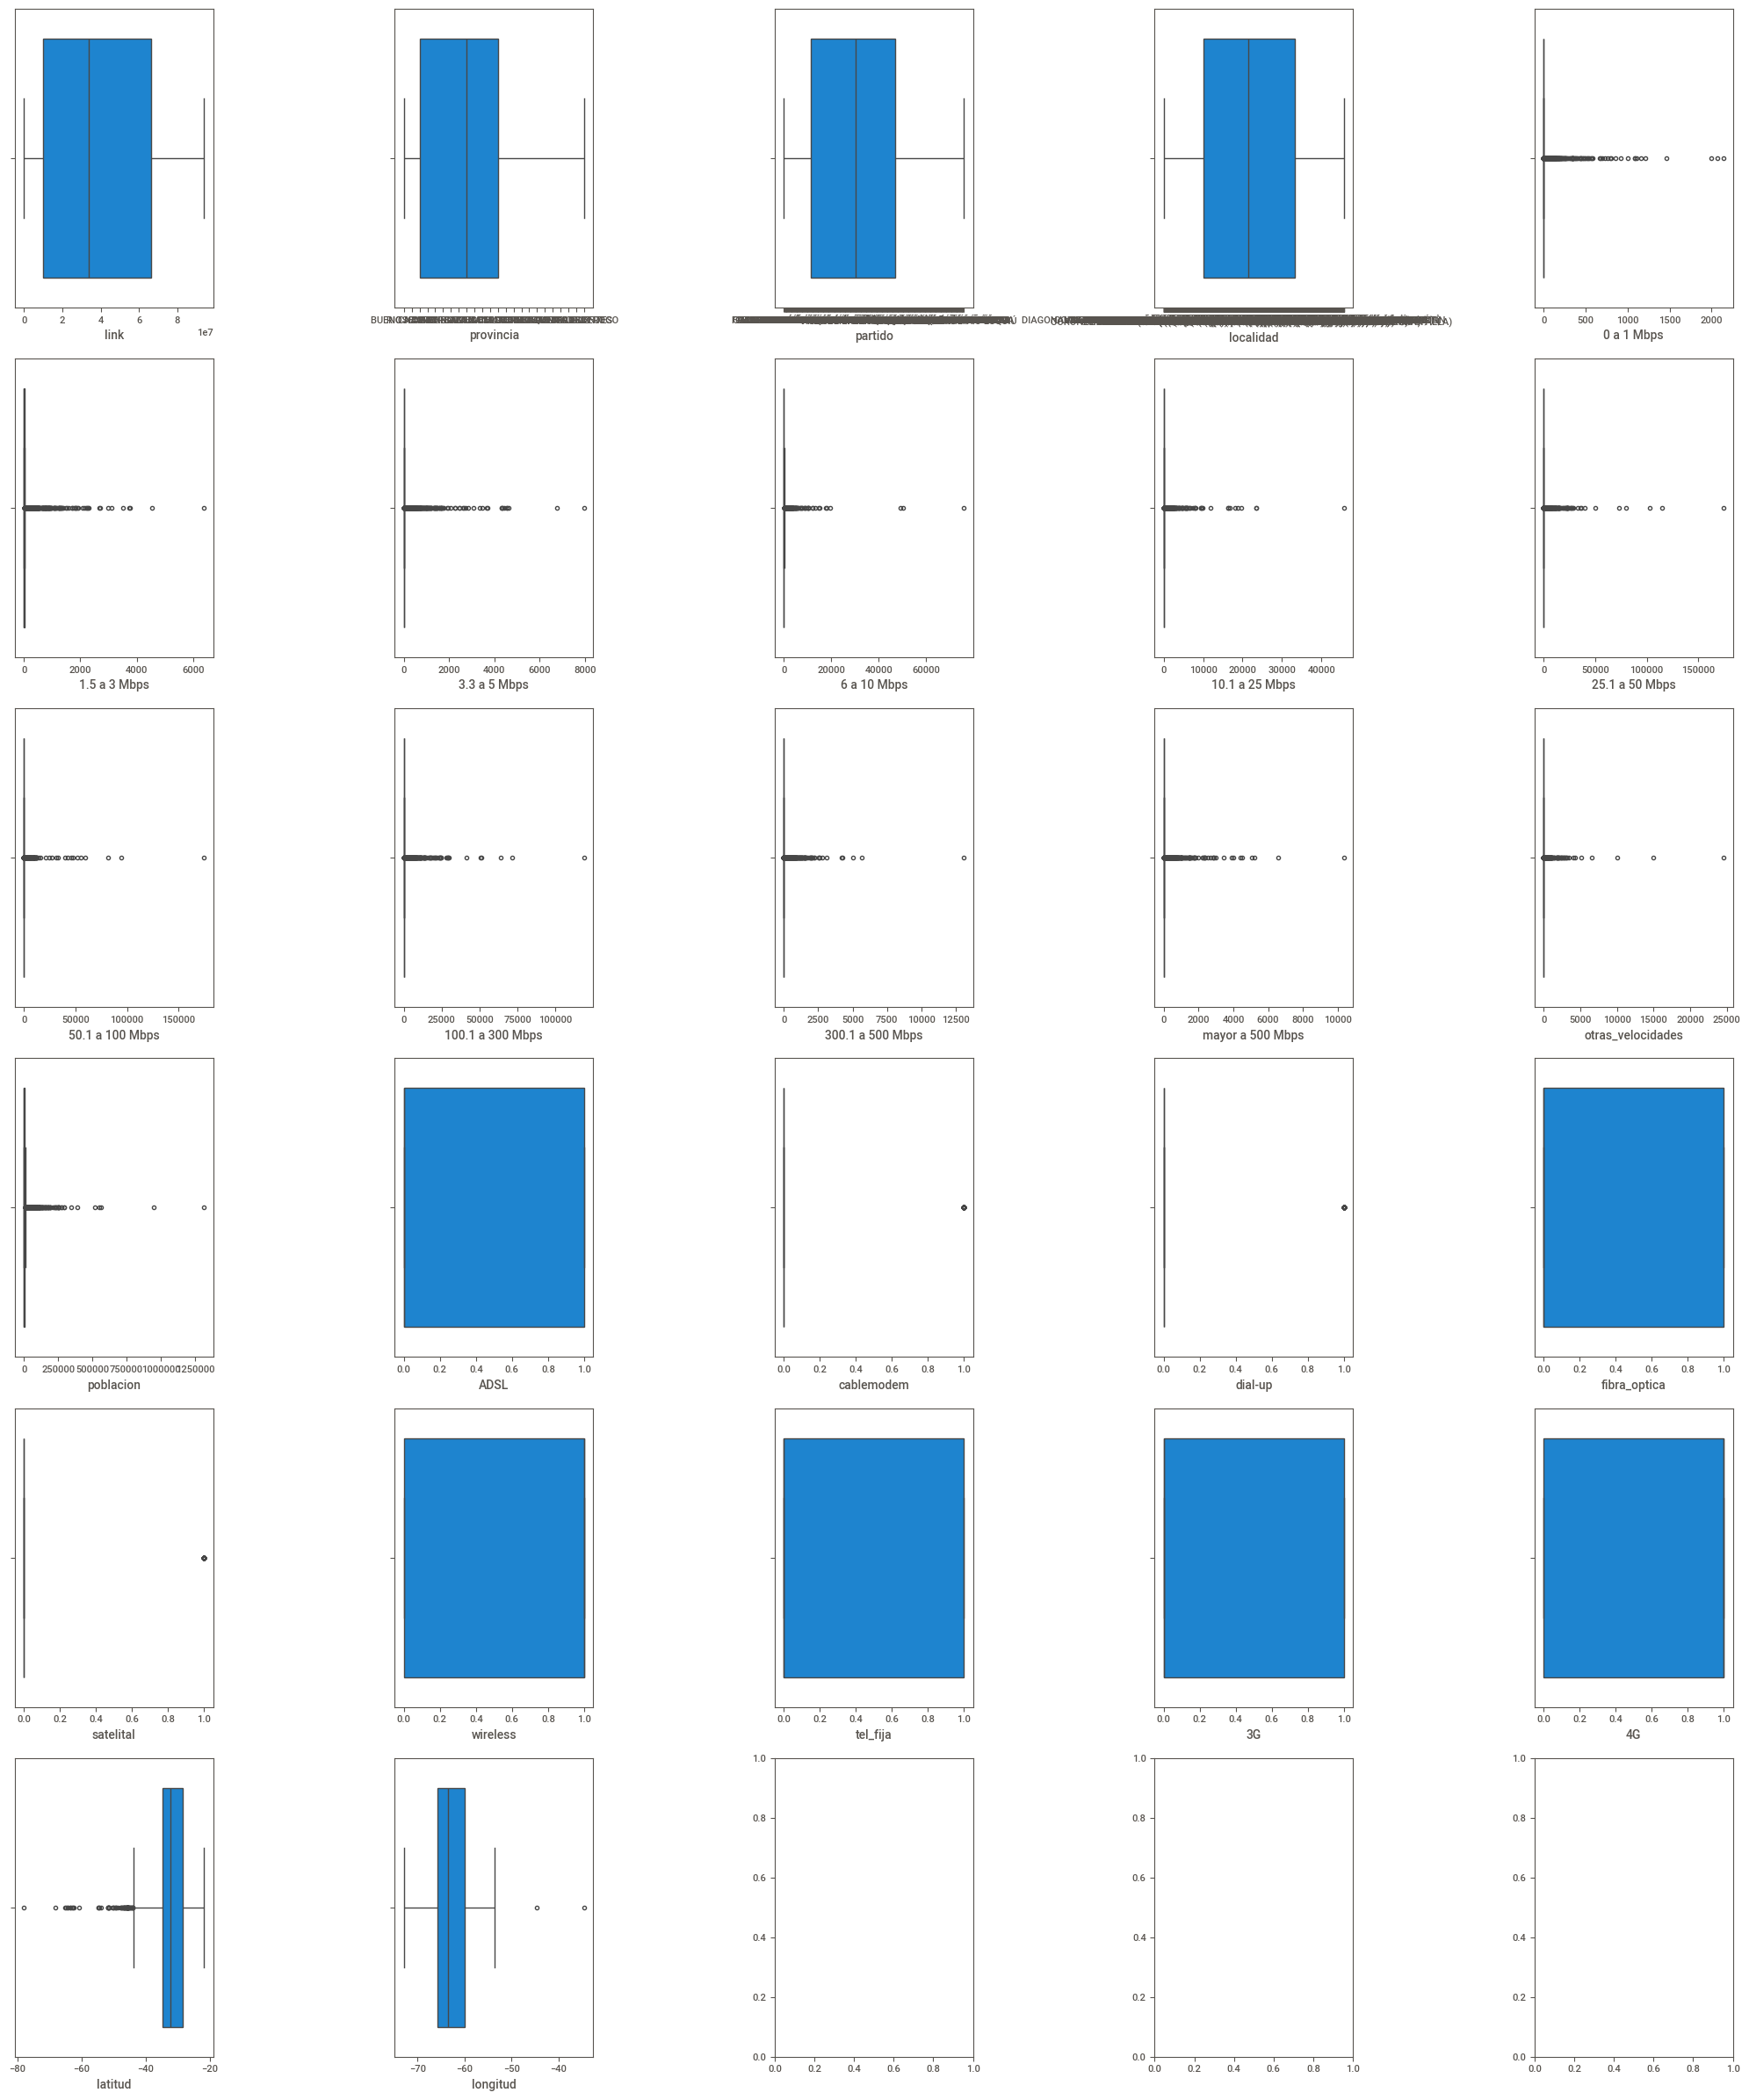

In [155]:
# Configurar la figura con 5 columnas y 6 filas
fig, axes = plt.subplots(6, 5, figsize=(20, 24))

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Crear un boxplot para cada variable
for i, col in enumerate(df.columns[:40]):  # Asegúrate de tener 30 columnas
    sns.boxplot(data=df, x=col, ax=axes[i])
    # axes[i].set_title(col)

# Ajustar el layout para evitar solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Como se puede observar en los graficos de caja, existen gran cantidad de outliers en algunas variables:
todas las variables que tienen en conteo de velocidades por rangos, muestran outliers, esto se debe a que en algunas provincias existe mayor velocidad que en otras en las que ni siquiera existen conocexiones a internet, en los graficos de rangos de velocidades se puede observar como la mayor parte de los datos son valores con cero.
Lo contrario ocurre con los tipos de tecnología con que cuenta la provincia puesto que existen provincias que cuentan con todas las tecnologías y otras que no, especificamente ADSL, fibra_optica, wireless, tel_fija, 3G y 4G se encuentran presentes en la mayoria de las localidades y son aquellas que predominan en el mercado. En contraste, cablemodem, dial up y satelital son las tecnologías que tiene poca presencia.

En cuanto a la cantidad de población existen pocas provincias con gran cantidad de población considerados como outliers, pero en general la mayoría de las provincias se encuentra con poblaciones menores a los 10,000 habitantes.

---
Correlaciones entre variables
---
---

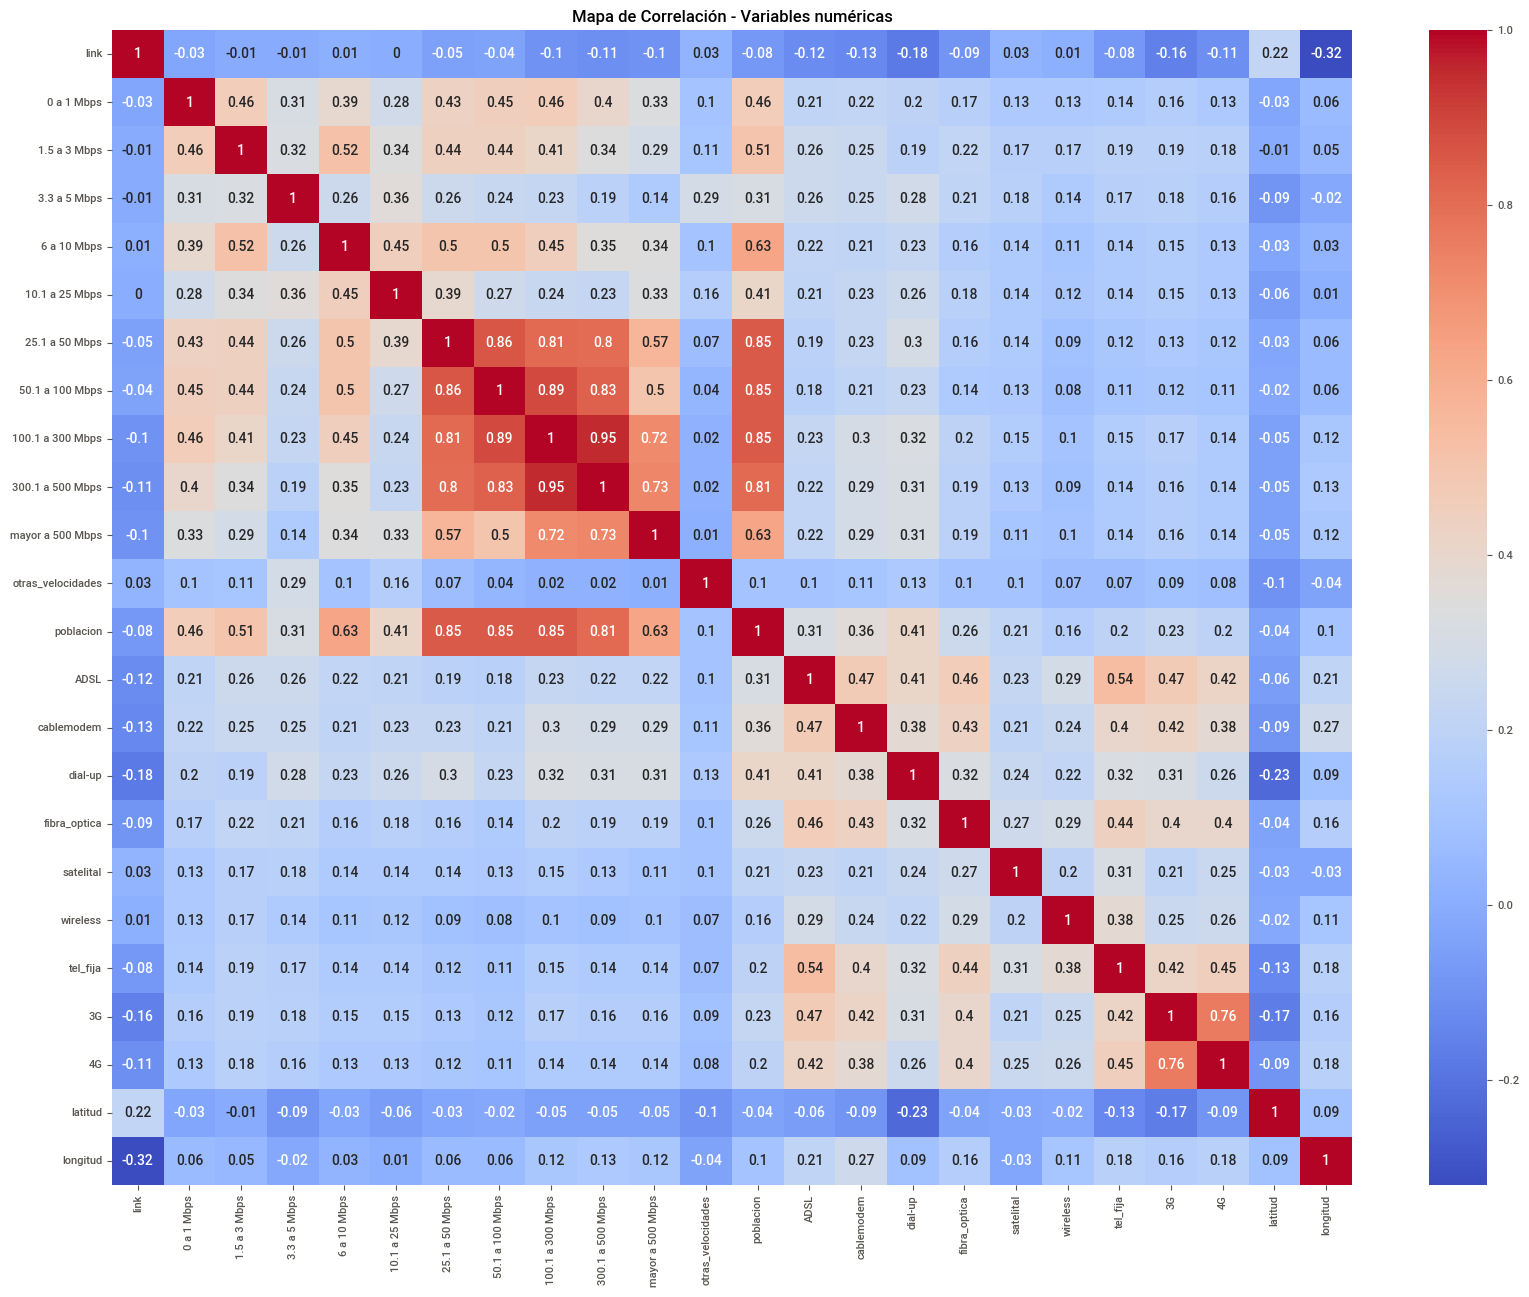

In [156]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = df.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

¿Qué se puede destacar de el gráfico mostrado?
Las correlaciones positivas entre variables que más llaman la atención son las de población con las velocidades de navegación superiores a 25 Mbps, ¿que significa esto?, que mientrs exista mayor población en una provincia, el tipo de velocidad también será mayor, mayor en un rango de 25.1 a 500 mbps y los valores de las correlaciones son mayores al 80%
De igual forma, la correlacion entre población y el tipo de servicio por fibra optica tiene una correlacion media positiva con un valor de 0.41


---
Rangos de velocidades por provincia
---
---

In [167]:
df.columns

Index(['link', 'provincia', 'partido', 'localidad', '0 a 1 Mbps',
       '1.5 a 3 Mbps', '3.3 a 5 Mbps', '6 a 10 Mbps', '10.1 a 25 Mbps',
       '25.1 a 50 Mbps', '50.1 a 100 Mbps', '100.1 a 300 Mbps',
       '300.1 a 500 Mbps', 'mayor a 500 Mbps', 'otras_velocidades',
       'poblacion', 'ADSL', 'cablemodem', 'dial-up', 'fibra_optica',
       'satelital', 'wireless', 'tel_fija', '3G', '4G', 'latitud', 'longitud'],
      dtype='object')

In [169]:
# Catidad de provincias, partidos y localidades que se encuentran en el dataset
print(f'Provincias: {df['provincia'].unique().size}')
print(f'Partido: {df['partido'].unique().size}')
print(f'Localidad: {df['localidad'].unique().size}')

Provincias: 24
Partido: 445
Localidad: 3897


Se puede notar que existen 24 provincias, 445 partidos y 3897 localidades, lo que sugiere trabajar el analisis con las provincias puesto que son pocas y será mejor la interpretación de los gráficos

---
Velocidades por provincia
---
---

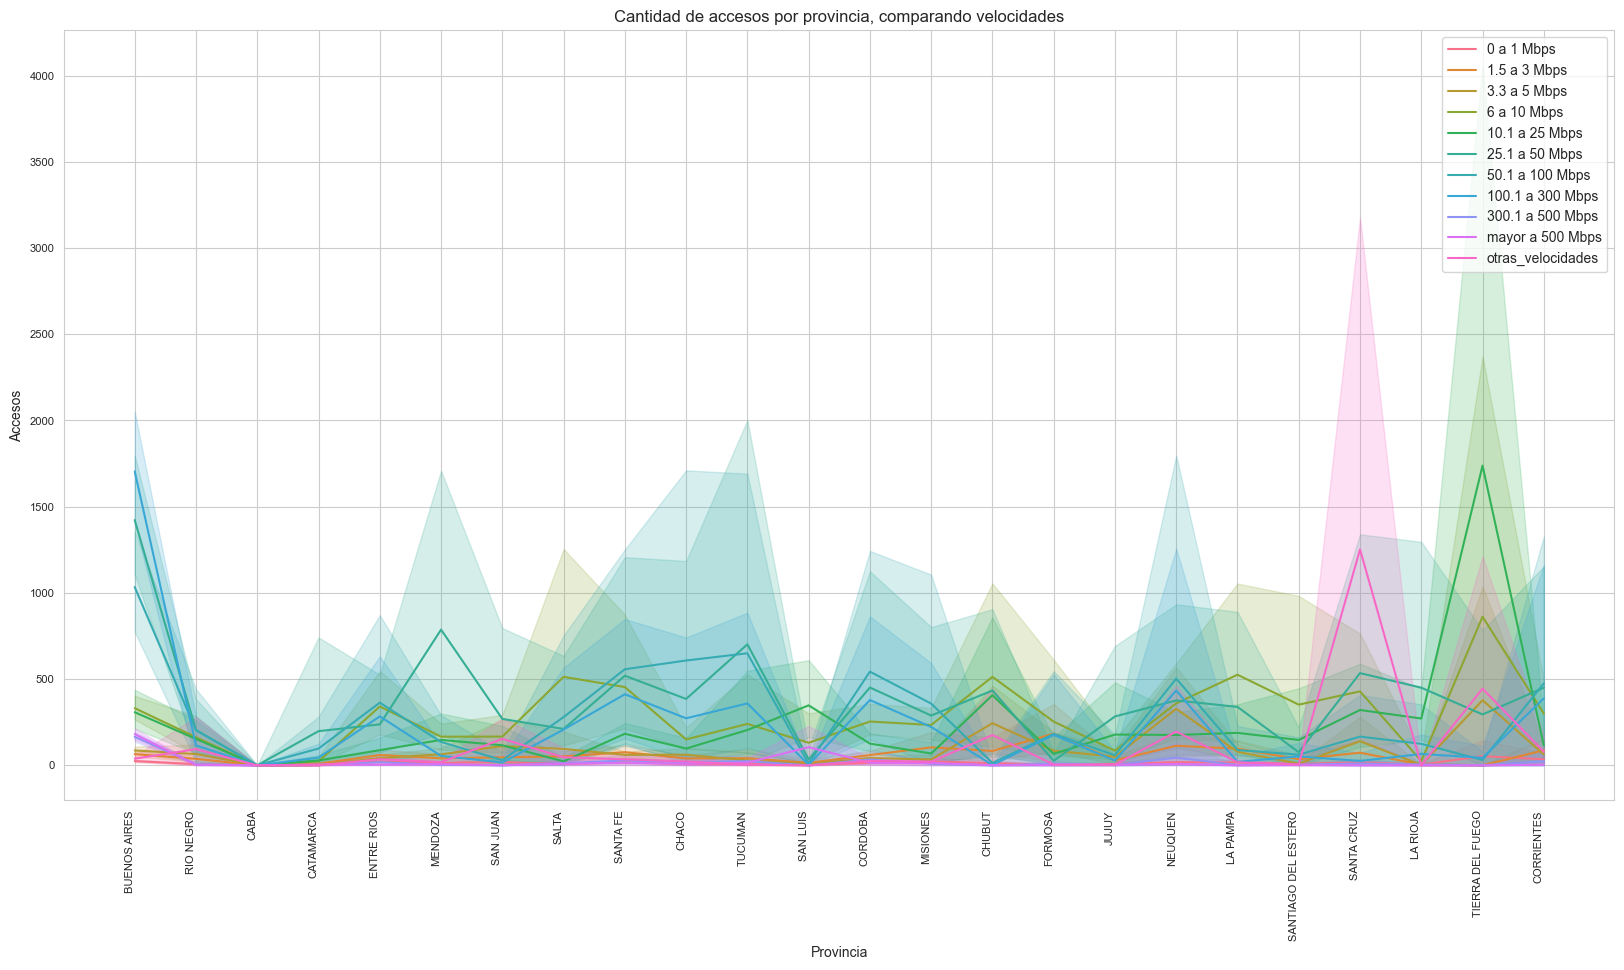

In [190]:
# Columnas a comparar
columnas = ['0 a 1 Mbps', '1.5 a 3 Mbps', '3.3 a 5 Mbps', '6 a 10 Mbps', '10.1 a 25 Mbps', '25.1 a 50 Mbps', '50.1 a 100 Mbps', '100.1 a 300 Mbps', '300.1 a 500 Mbps', 'mayor a 500 Mbps', 'otras_velocidades']

# Transformar los datos con melt para cambiar columnas por filas
df_melt = pd.melt(df, id_vars='provincia', value_vars=columnas)

# Graficar las líneas
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_melt, x="provincia", y="value", hue="variable")
plt.xticks(rotation=90, ha='right')
plt.title('Cantidad de accesos por provincia, comparando velocidades')
plt.xlabel('Provincia')
plt.ylabel('Accesos')
plt.legend()

plt.show()

El gráfico muestra las diferentes velocidades por cada provincia, se nota que no hay existencia de homogeneidad, cada provincia tiene datos diferentes, sin embargo lo que si se rescata es que velocidades entre rangos de 0 a 5 y de mayor de 500 Mbps, son muy escasas sienda estas ultimas laas que menos acceso tienen.

In [203]:
provincias = list(df['provincia'].unique())
provincias

['BUENOS AIRES',
 'RIO NEGRO',
 'CABA',
 'CATAMARCA',
 'ENTRE RIOS',
 'MENDOZA',
 'SAN JUAN',
 'SALTA',
 'SANTA FE',
 'CHACO',
 'TUCUMAN',
 'SAN LUIS',
 'CORDOBA',
 'MISIONES',
 'CHUBUT',
 'FORMOSA',
 'JUJUY',
 'NEUQUEN',
 'LA PAMPA',
 'SANTIAGO DEL ESTERO',
 'SANTA CRUZ',
 'LA RIOJA',
 'TIERRA DEL FUEGO',
 'CORRIENTES']

In [202]:
velocidades = ['0 a 1 Mbps', '1.5 a 3 Mbps', '3.3 a 5 Mbps', '6 a 10 Mbps', '10.1 a 25 Mbps', '25.1 a 50 Mbps', '50.1 a 100 Mbps', '100.1 a 300 Mbps', '300.1 a 500 Mbps', 'mayor a 500 Mbps', 'otras_velocidades']
velocidades

['0 a 1 Mbps',
 '1.5 a 3 Mbps',
 '3.3 a 5 Mbps',
 '6 a 10 Mbps',
 '10.1 a 25 Mbps',
 '25.1 a 50 Mbps',
 '50.1 a 100 Mbps',
 '100.1 a 300 Mbps',
 '300.1 a 500 Mbps',
 'mayor a 500 Mbps',
 'otras_velocidades']

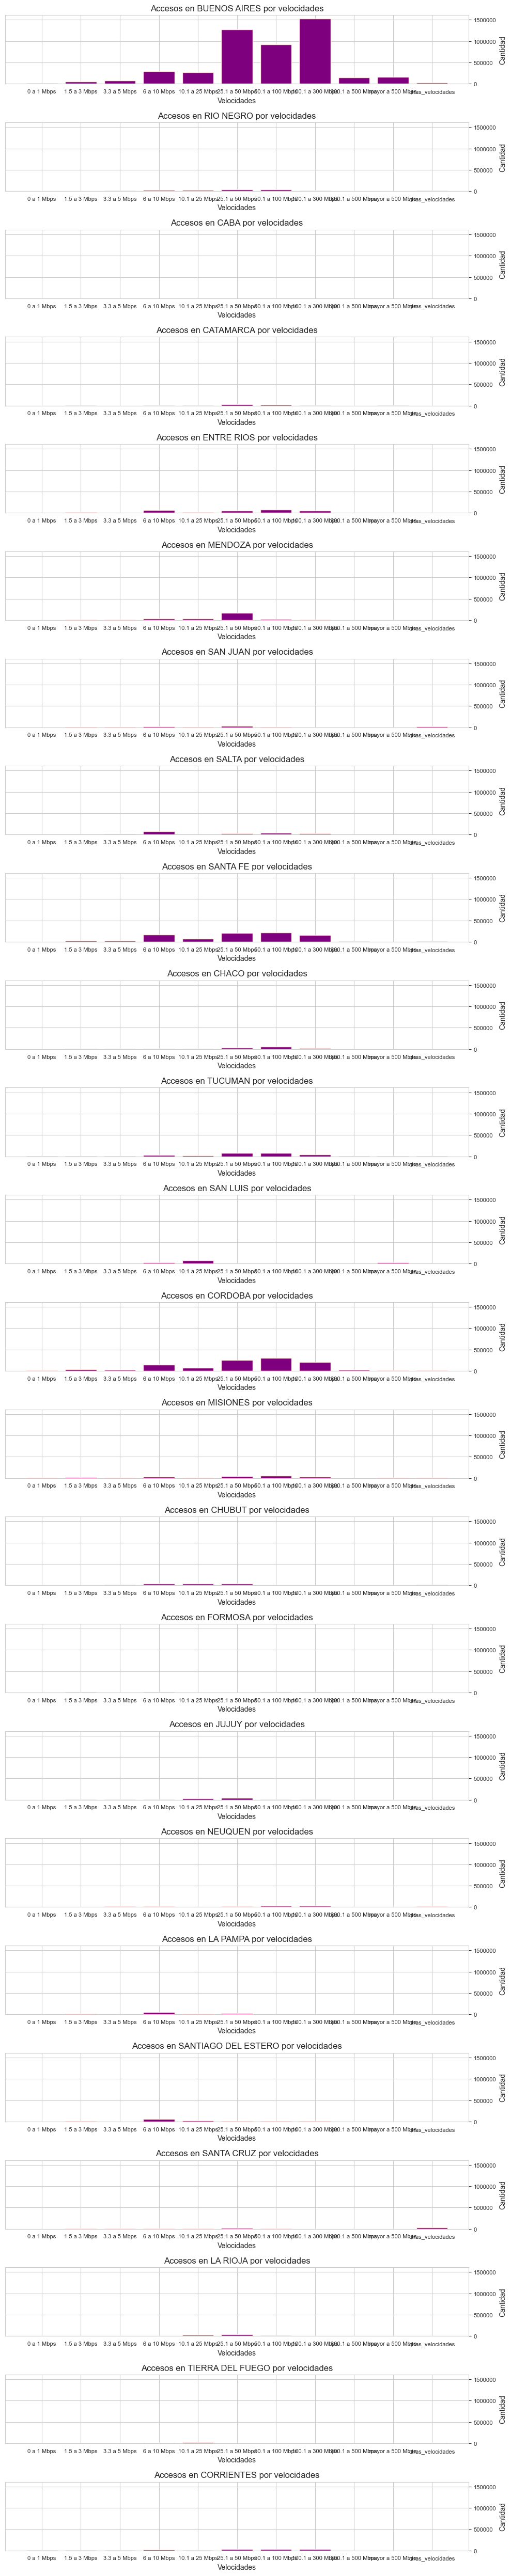

In [261]:
fig, axs = plt.subplots(len(provincias), 1, figsize=(10, 50), sharey=True)

for i, provincia in enumerate(provincias):
    df_provincia = df[df['provincia'] == provincia]
    axs[i].bar(velocidades, df_provincia[velocidades].sum(), color='blue')
    axs[i].bar(velocidades, df_provincia[velocidades].sum(), color='red', alpha=0.5)
    axs[i].set_title(f'Accesos en {provincia} por velocidades')
    axs[i].set_xlabel('Velocidades')
    axs[i].set_ylabel('Cantidad')
    axs[i].yaxis.set_label_position("right")
    axs[i].yaxis.tick_right()

plt.tight_layout()
plt.show()

La provincia con mayor accesos por velocidad es la capital Buenos Aires y en ella predomina el rango de 100 a 300 Mbps, en esta misma provincia la segunda velocidad es de 25 a 50 Mbps y la menor es de 0 a 1 Mbps, esta provincia tiene mas del 50% de accesos a internet
Por otra parte, la provincia CABA no cuenta con datos, por lo que se puede considerar dejarla fuera de este análisis, sin embargo es una provincia muy importante. De igual forma existen provincias que no tiene ningún acceso a internet como Formosa.
Y las provincias con menor cantidad de accesos son: Rio Negro, Catamarca, San Juan, Chubut, Neuquen, La pampa Santa Cruz, La Rioja y Tierra de Fuego.

In [257]:
total_accesos = 0
accesos_por_velocidad = {}
for velocidad in velocidades:
    total_accesos += df[velocidad].sum()
    accesos_por_velocidad[velocidad] = df[velocidad].sum()

print(total_accesos)

9863886


El total de accesos es alrededror de 9.8 millones considerando todas las velocidades

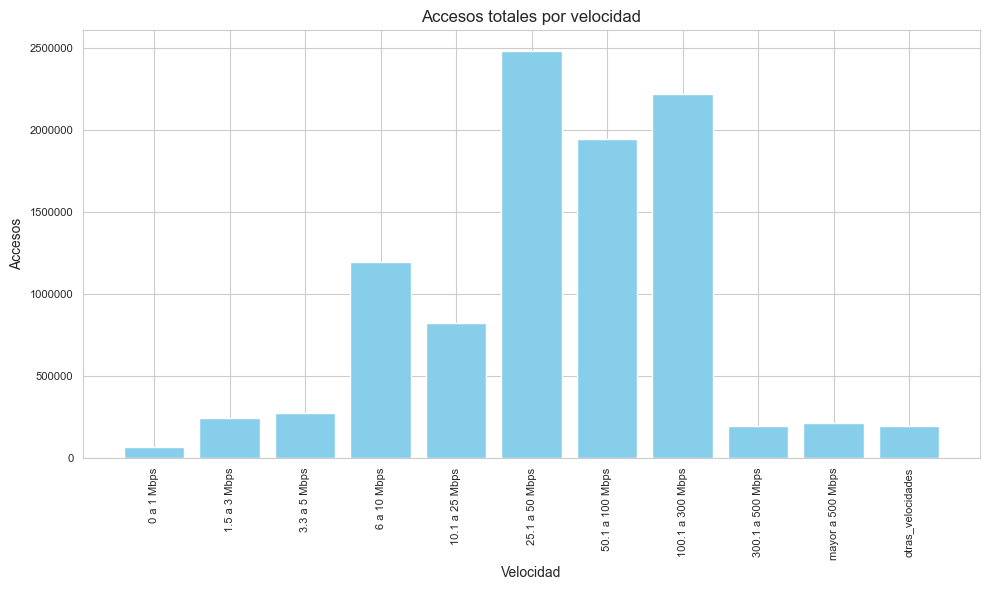

In [262]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(accesos_por_velocidad.keys(), accesos_por_velocidad.values(), color='skyblue')
plt.title('Accesos totales por velocidad')
plt.xlabel('Velocidad')
plt.ylabel('Accesos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

El gráfico muestra como la mayor parte de accesos se encuentra en rangos de velocidad de entre 25 a 300 Mbps

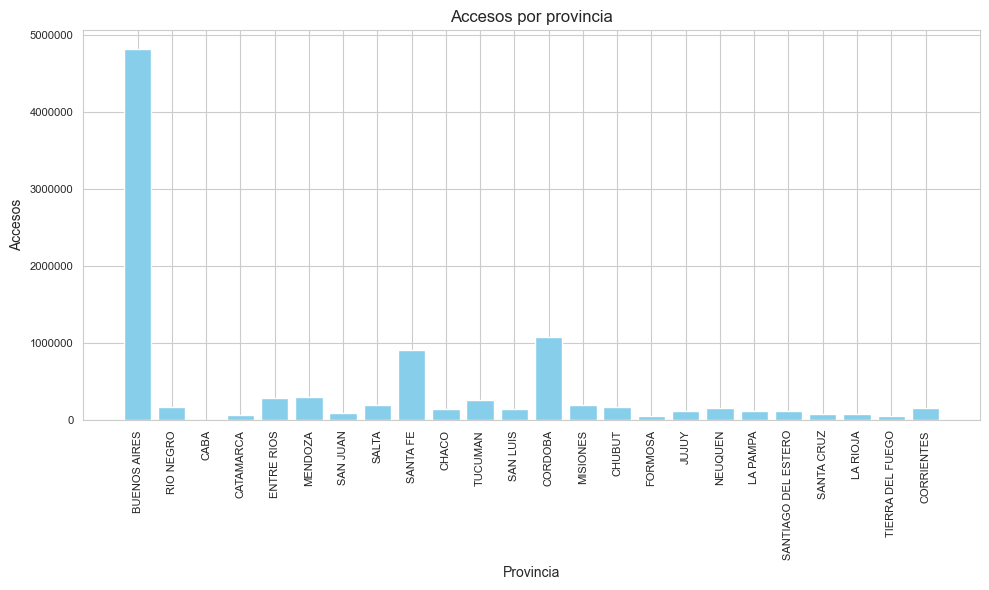

In [263]:
accesos_por_provincia = {}
for provincia in provincias:
    accesos_por_provincia[provincia] = df[df['provincia'] == provincia][velocidades].sum().sum()


plt.figure(figsize=(10, 6))
plt.bar(accesos_por_provincia.keys(), accesos_por_provincia.values(), color='skyblue')
plt.title('Accesos por provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Se puede notar como la provincia de Buenos Aires seguido de Cordoba y Santa Fe en el tercer lugar son la que mayor accesos de internet tienen, mientras que Caba no tiene datos, seguida de Tierra de Fuego y formosa

In [264]:
provincias

['BUENOS AIRES',
 'RIO NEGRO',
 'CABA',
 'CATAMARCA',
 'ENTRE RIOS',
 'MENDOZA',
 'SAN JUAN',
 'SALTA',
 'SANTA FE',
 'CHACO',
 'TUCUMAN',
 'SAN LUIS',
 'CORDOBA',
 'MISIONES',
 'CHUBUT',
 'FORMOSA',
 'JUJUY',
 'NEUQUEN',
 'LA PAMPA',
 'SANTIAGO DEL ESTERO',
 'SANTA CRUZ',
 'LA RIOJA',
 'TIERRA DEL FUEGO',
 'CORRIENTES']

In [265]:
df.columns

Index(['link', 'provincia', 'partido', 'localidad', '0 a 1 Mbps',
       '1.5 a 3 Mbps', '3.3 a 5 Mbps', '6 a 10 Mbps', '10.1 a 25 Mbps',
       '25.1 a 50 Mbps', '50.1 a 100 Mbps', '100.1 a 300 Mbps',
       '300.1 a 500 Mbps', 'mayor a 500 Mbps', 'otras_velocidades',
       'poblacion', 'ADSL', 'cablemodem', 'dial-up', 'fibra_optica',
       'satelital', 'wireless', 'tel_fija', '3G', '4G', 'latitud', 'longitud'],
      dtype='object')

In [266]:
servicios = ['ADSL', 'cablemodem', 'dial-up', 'fibra_optica',
       'satelital', 'wireless', 'tel_fija', '3G', '4G']

---
Tipo de servicios por provincia
---
---

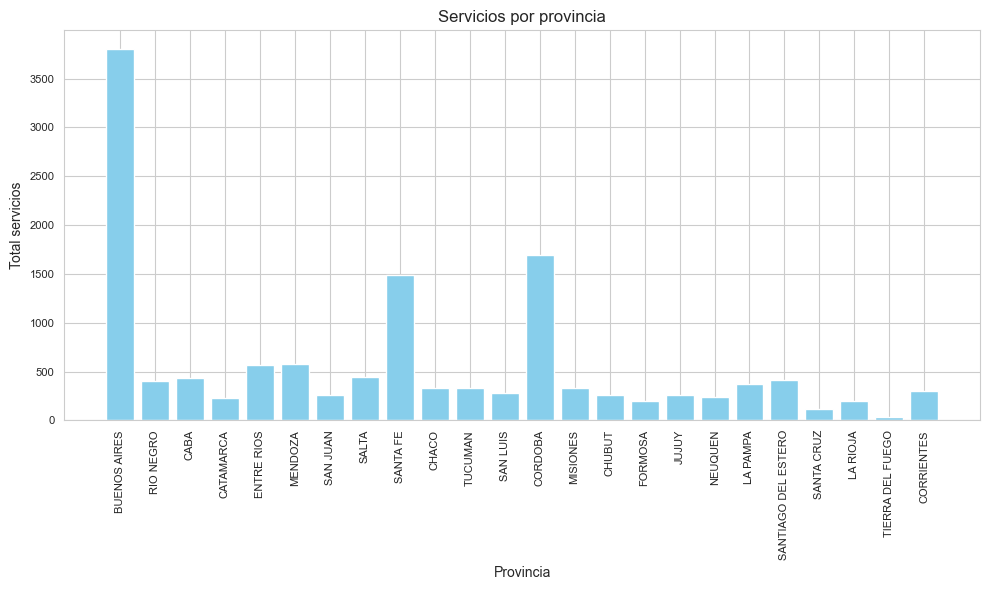

In [269]:
servicios_por_provincia = {}
for provincia in provincias:
    servicios_por_provincia[provincia] = df[df['provincia'] == provincia][servicios].sum().sum()


plt.figure(figsize=(10, 6))
plt.bar(servicios_por_provincia.keys(), servicios_por_provincia.values(), color='skyblue')
plt.title('Servicios por provincia')
plt.xlabel('Provincia')
plt.ylabel('Total servicios')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [270]:
df.columns

Index(['link', 'provincia', 'partido', 'localidad', '0 a 1 Mbps',
       '1.5 a 3 Mbps', '3.3 a 5 Mbps', '6 a 10 Mbps', '10.1 a 25 Mbps',
       '25.1 a 50 Mbps', '50.1 a 100 Mbps', '100.1 a 300 Mbps',
       '300.1 a 500 Mbps', 'mayor a 500 Mbps', 'otras_velocidades',
       'poblacion', 'ADSL', 'cablemodem', 'dial-up', 'fibra_optica',
       'satelital', 'wireless', 'tel_fija', '3G', '4G', 'latitud', 'longitud'],
      dtype='object')

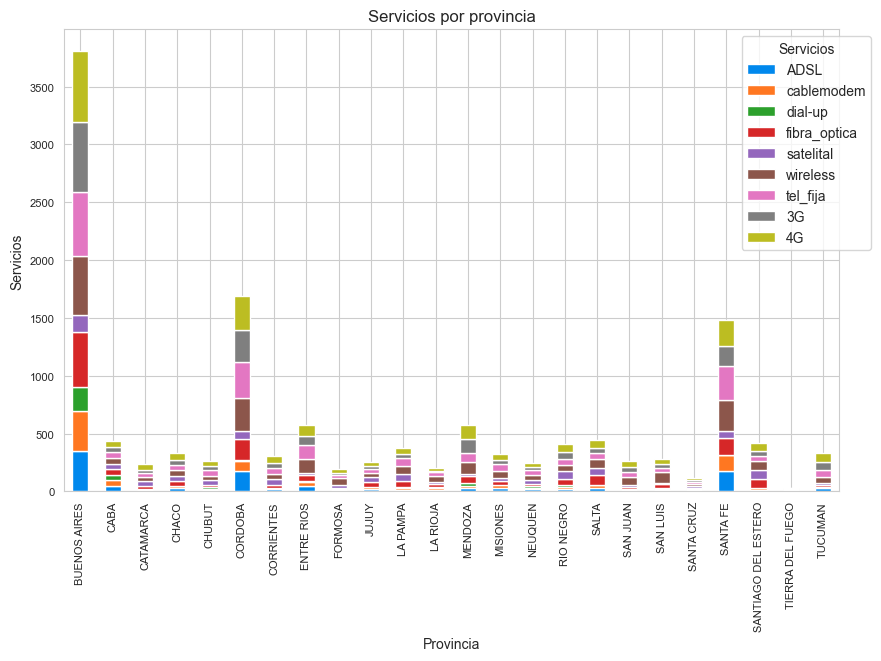

In [274]:
accesos_por_provincia = df.groupby('provincia')[servicios].sum()

accesos_por_provincia.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Servicios por provincia')
plt.xlabel('Provincia')
plt.ylabel('Servicios')
plt.legend(title='Servicios', bbox_to_anchor=(1.05, 1))
plt.show()

En el gráfico se puede notar como las provincias Santa Cruz, tierra de fuego, Neuquen, La rioja, Formosa Catamarca Chubut, entre otras tiene un bajo acceso y disponen de no todos los servicios de conexion a internet
Mientras que Buenos Aires, Cordoba y santa Fe tiene gran cantidad de accesos y de servicios.

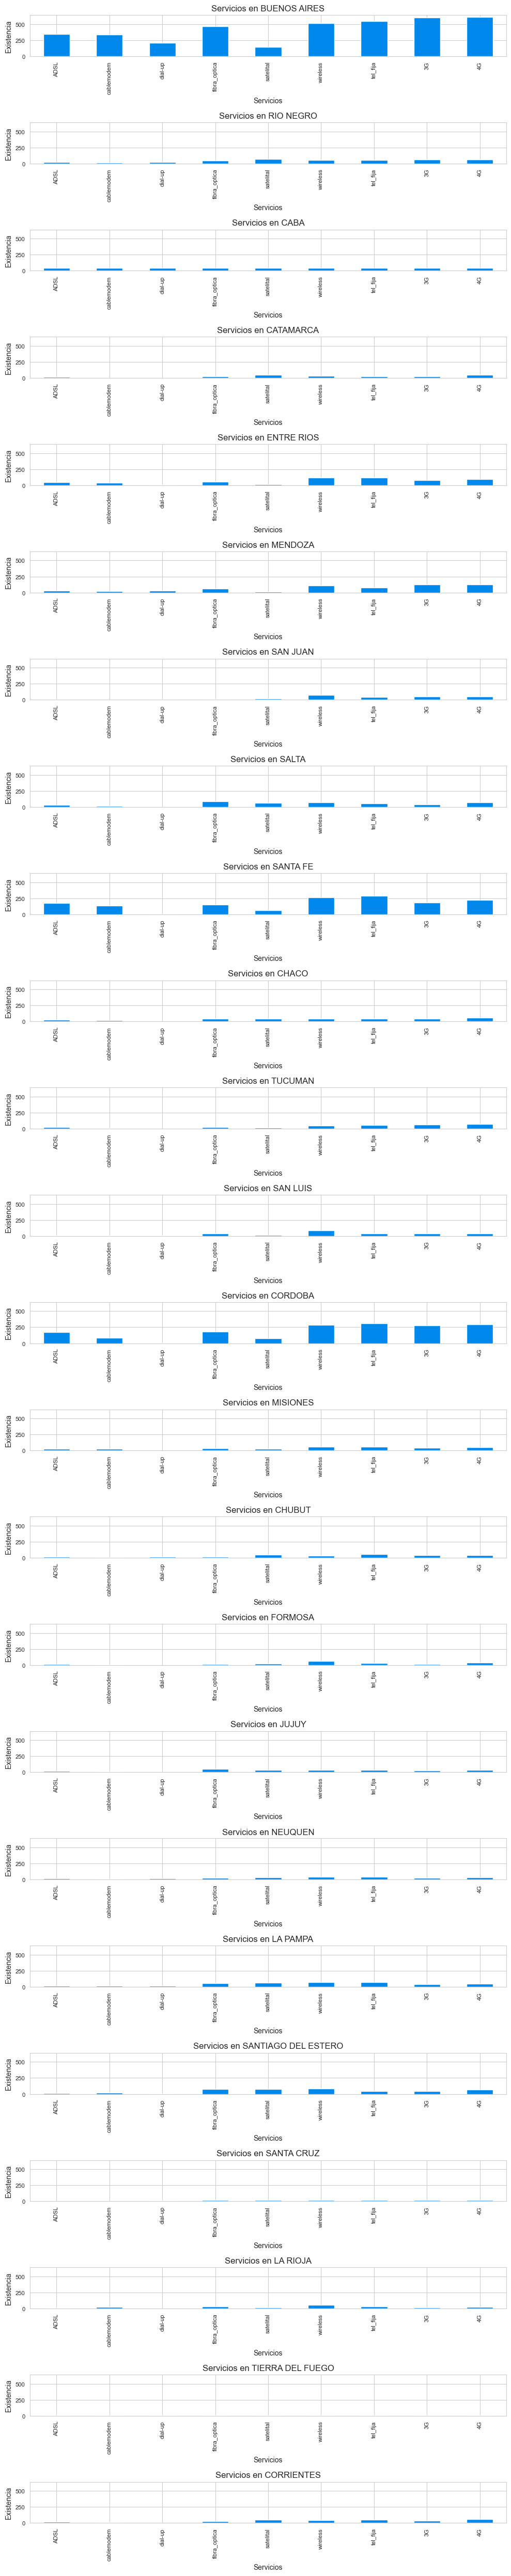

In [276]:
fig, axs = plt.subplots(len(provincias), 1, figsize=(10, 50), sharey=True)

for i, provincia in enumerate(provincias):
    df_provincia = df[df['provincia'] == provincia]
    df_provincia[servicios].sum().plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'Servicios en {provincia}')
    axs[i].set_xlabel('Servicios')
    axs[i].set_ylabel('Existencia')

plt.tight_layout()
plt.show()

En el gráfico anterior que muestra los servicios la idea es que en todas las provicnias se cuenten con todos los servicios, y se observa que así es, se cuentan con los servicios pero en algunas no existe gran cantidad de accesos.

---
Poblacion por provincias
---
---

In [278]:
df.columns

Index(['link', 'provincia', 'partido', 'localidad', '0 a 1 Mbps',
       '1.5 a 3 Mbps', '3.3 a 5 Mbps', '6 a 10 Mbps', '10.1 a 25 Mbps',
       '25.1 a 50 Mbps', '50.1 a 100 Mbps', '100.1 a 300 Mbps',
       '300.1 a 500 Mbps', 'mayor a 500 Mbps', 'otras_velocidades',
       'poblacion', 'ADSL', 'cablemodem', 'dial-up', 'fibra_optica',
       'satelital', 'wireless', 'tel_fija', '3G', '4G', 'latitud', 'longitud'],
      dtype='object')

In [279]:
poblacion = ['poblacion']

In [280]:
poblacion_por_provincia = {}
for provincia in provincias:
    poblacion_por_provincia[provincia] = df[df['provincia'] == provincia][poblacion].sum().sum()

In [282]:
poblacion_por_provincia

{'BUENOS AIRES': 14911542,
 'RIO NEGRO': 596964,
 'CABA': 2890151,
 'CATAMARCA': 343343,
 'ENTRE RIOS': 1119919,
 'MENDOZA': 1654993,
 'SAN JUAN': 631000,
 'SALTA': 1117163,
 'SANTA FE': 3055611,
 'CHACO': 927414,
 'TUCUMAN': 1210114,
 'SAN LUIS': 410669,
 'CORDOBA': 3139606,
 'MISIONES': 836097,
 'CHUBUT': 490554,
 'FORMOSA': 452714,
 'JUJUY': 628141,
 'NEUQUEN': 522527,
 'LA PAMPA': 302570,
 'SANTIAGO DEL ESTERO': 671932,
 'SANTA CRUZ': 268436,
 'LA RIOJA': 319248,
 'TIERRA DEL FUEGO': 125823,
 'CORRIENTES': 857994}

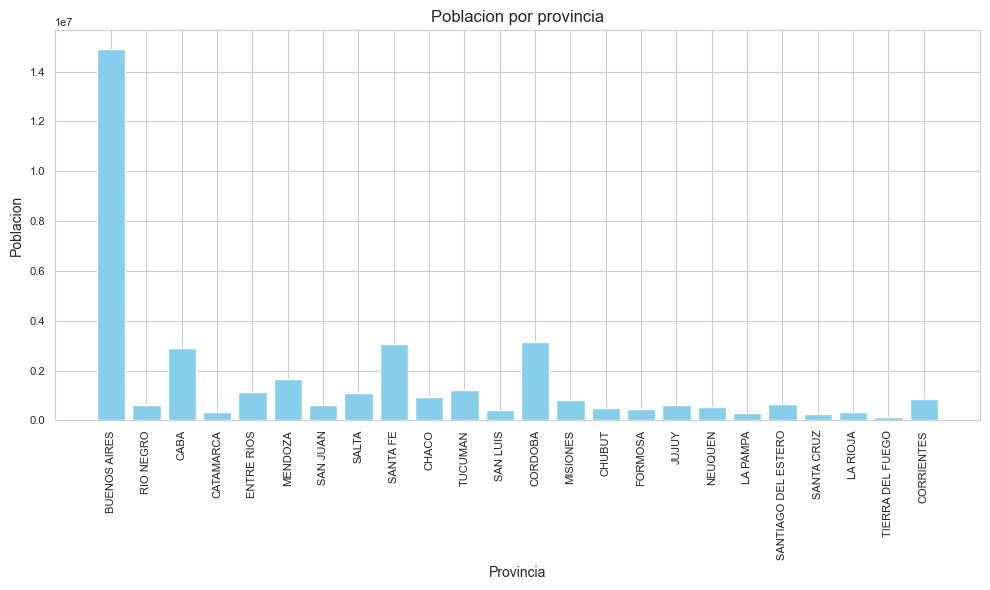

In [283]:
plt.figure(figsize=(10, 6))
plt.bar(poblacion_por_provincia.keys(), poblacion_por_provincia.values(), color='skyblue')
plt.title('Poblacion por provincia')
plt.xlabel('Provincia')
plt.ylabel('Poblacion')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

En el grafico anterior se muestra la cantidad de población por provincia y se observa como Bueno aires es la provincia con mayor población